### AI and the Markets - Forecasting Stock Behavior in Leading Banks

In [1]:
# Install the yfinance Package If not Installed
!pip install yfinance

import yfinance as yf   # Import the Package

# Define the Tickers for the Banking Stocks
tickers = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']  # Using NSE symbols

# Dictionary to Store Data for Each Stock
banking_data = {}

# Fetch Data for Each Bank for the Last 5 Years
for ticker in tickers:
    banking_data[ticker] = yf.download(ticker, start='2018-01-01', end='2023-01-01')
    print(f"Data for {ticker} downloaded successfully.")

# Preview the First Few Rows of the Dataset for Each Bank
for ticker, df in banking_data.items():
    print(f"\nFirst few rows of {ticker}:")
    print(df.head())


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[*********************100%***********************]  1 of 1 completed


Data for HDFCBANK.NS downloaded successfully.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AXISBANK.NS downloaded successfully.
Data for ICICIBANK.NS downloaded successfully.

First few rows of HDFCBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  936.349976  940.375000  925.250000  927.250000  877.075317   
2018-01-02  929.275024  937.500000  929.275024  936.174988  885.517334   
2018-01-03  937.500000  939.125000  925.599976  926.325012  876.200378   
2018-01-04  926.500000  932.750000  926.500000  929.950012  879.629150   
2018-01-05  931.500000  934.025024  927.775024  931.799988  881.379089   

             Volume  
Date                 
2018-01-01  3290258  
2018-01-02  2388158  
2018-01-03  2265644  
2018-01-04  1186888  
2018-01-05  1435434  

First few rows of AXISBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  563.799988

**Computing Daily Returns**

In [2]:
import pandas as pd

# Compute Daily Returns for Each Banking Stock
for ticker, df in banking_data.items():
    df['Daily Return'] = df['Close'].pct_change()
    banking_data[ticker] = df  # Update the Dictionary with New Data

# Display the First Few Rows for Each Bank
for ticker, df in banking_data.items():
    print(f"\nFirst few rows of {ticker} with Daily Return:")
    print(df[['Close', 'Daily Return']].head())


First few rows of HDFCBANK.NS with Daily Return:
                 Close  Daily Return
Date                                
2018-01-01  927.250000           NaN
2018-01-02  936.174988      0.009625
2018-01-03  926.325012     -0.010522
2018-01-04  929.950012      0.003913
2018-01-05  931.799988      0.001989

First few rows of AXISBANK.NS with Daily Return:
                 Close  Daily Return
Date                                
2018-01-01  565.500000           NaN
2018-01-02  559.500000     -0.010610
2018-01-03  560.450012      0.001698
2018-01-04  559.900024     -0.000981
2018-01-05  563.250000      0.005983

First few rows of ICICIBANK.NS with Daily Return:
                 Close  Daily Return
Date                                
2018-01-01  310.299988           NaN
2018-01-02  309.700012     -0.001934
2018-01-03  315.000000      0.017113
2018-01-04  314.700012     -0.000952
2018-01-05  312.899994     -0.005720


In [3]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-26  881.099976  897.000000  875.250000  893.200012  871.144165   
2022-12-27  897.700012  902.750000  888.200012  900.650024  878.410156   
2022-12-28  896.000000  903.950012  895.799988  898.950012  876.752197   
2022-12-29  897.900024  923.349976  889.349976  908.049988  885.627441   
2022-12-30  908.500000  908.500000  888.549988  890.849976  868.852112   

              Volume  Daily Return  
Date                                
2022-12-26   6943159      0.016270  
2022-12-27   4994381      0.008341  
2022-12-28   8980300     -0.001888  
2022-12-29  11994220      0.010123  
2022-12-30   9688527     -0.018942

In [4]:
# Display the Last Few Rows for Each Bank
for ticker, df in banking_data.items():
    print(f"\nLast few rows of {ticker}:")
    print(df.tail())


Last few rows of HDFCBANK.NS:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-26  1599.500000  1639.000000  1590.000000  1629.449951  1589.273315   
2022-12-27  1633.000000  1635.949951  1613.500000  1631.099976  1590.882568   
2022-12-28  1623.099976  1633.000000  1623.099976  1629.800049  1589.614746   
2022-12-29  1620.099976  1643.500000  1611.000000  1641.300049  1600.831177   
2022-12-30  1645.000000  1645.000000  1620.000000  1628.150024  1588.005371   

             Volume  Daily Return  
Date                               
2022-12-26  4953661      0.019904  
2022-12-27  3963386      0.001013  
2022-12-28  4345935     -0.000797  
2022-12-29  5506448      0.007056  
2022-12-30  3561320     -0.008012  

Last few rows of AXISBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                      

In [5]:
# Resampling to Monthly Frequency for Each Bank
monthly_data = {}

for ticker, df in banking_data.items():
    monthly_data[ticker] = df['Adj Close'].resample('M').last()

# Display the First Few Rows of Monthly Data for Each Bank
for ticker, df in monthly_data.items():
    print(f"\nMonthly Resampled Data for {ticker}:")
    print(df.head())


Monthly Resampled Data for HDFCBANK.NS:
Date
2018-01-31     948.584534
2018-02-28     891.121765
2018-03-31     892.020325
2018-04-30     919.545715
2018-05-31    1018.303589
Freq: M, Name: Adj Close, dtype: float64

Monthly Resampled Data for AXISBANK.NS:
Date
2018-01-31    590.291809
2018-02-28    525.803101
2018-03-31    507.654907
2018-04-30    514.416992
2018-05-31    542.857605
Freq: M, Name: Adj Close, dtype: float64

Monthly Resampled Data for ICICIBANK.NS:
Date
2018-01-31    336.105682
2018-02-28    298.300323
2018-03-31    265.065857
2018-04-30    270.636719
2018-05-31    272.160339
Freq: M, Name: Adj Close, dtype: float64


In [6]:
# Check for Missing Values in Monthly Data for Each Bank
for ticker, df in monthly_data.items():
    print(f"\nMissing values in {ticker}:")
    print(df.isna().sum())


Missing values in HDFCBANK.NS:
0

Missing values in AXISBANK.NS:
0

Missing values in ICICIBANK.NS:
0


**How to Handle Missing Data During Resampling ?**

Sometimes resampling can introduce missing data, especially when resampling to lower frequencies (e.g., from daily to monthly). Pandas provides several ways to handle missing values after resampling:

1. ffill() (Forward Fill): Fills missing values with the previous valid value.
2. bfill() (Backward Fill): Fills missing values with the next valid value.

In [7]:
# Forward Fill for Each Bank
monthly_data = {}

for ticker, df in banking_data.items():
    monthly_data[ticker] = df['Close'].resample('M').last().ffill()

In [8]:
# Backward Fill for Each Bank
monthly_data = {}

for ticker, df in banking_data.items():
    monthly_data[ticker] = df['Close'].resample('M').last().bfill()

In [9]:
# Summary Statistics for the Adjusted Close Prices of Each Bank
summary_stats = {}

for ticker, df in banking_data.items():
    summary_stats[ticker] = df['Close'].describe()

# Display Summary Statistics for Each Bank
for ticker, stats in summary_stats.items():
    print(f"\nSummary Statistics for {ticker}:")
    print(stats)


Summary Statistics for HDFCBANK.NS:
count    1236.000000
mean     1253.629087
std       222.340400
min       767.700012
25%      1054.193726
50%      1237.274963
75%      1464.987457
max      1688.699951
Name: Close, dtype: float64

Summary Statistics for AXISBANK.NS:
count    1236.000000
mean      659.936003
std       125.479331
min       303.149994
25%       566.587509
50%       685.225006
75%       747.362488
max       949.750000
Name: Close, dtype: float64

Summary Statistics for ICICIBANK.NS:
count    1236.000000
mean      524.010315
std       193.914829
min       259.250000
25%       354.624992
50%       470.824997
75%       702.500015
max       952.900024
Name: Close, dtype: float64


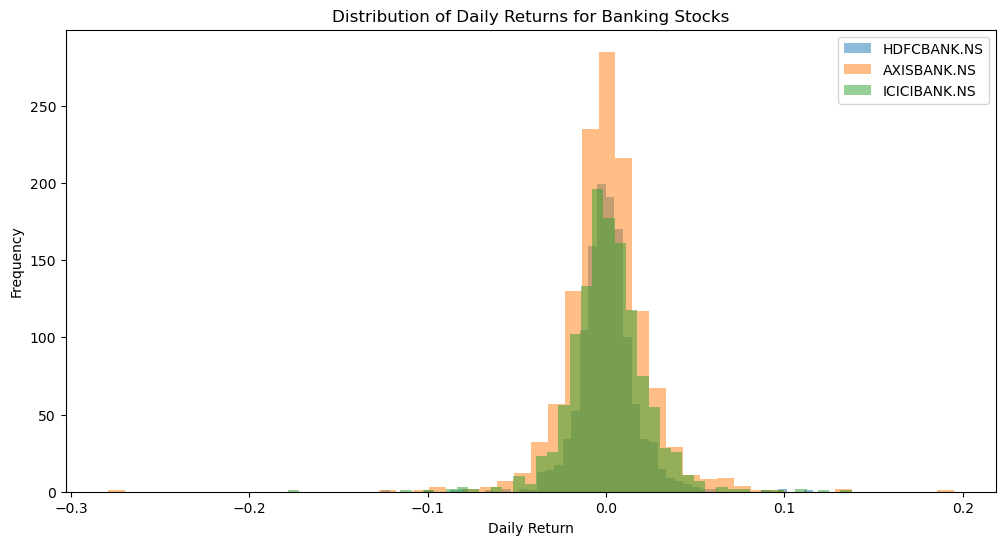

In [10]:
import matplotlib.pyplot as plt

# Plot Histogram for Daily Returns of Each Bank
plt.figure(figsize=(12, 6))

for ticker, df in banking_data.items():
    plt.hist(df['Daily Return'].dropna(), bins=50, alpha=0.5, label=ticker)

plt.title('Distribution of Daily Returns for Banking Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

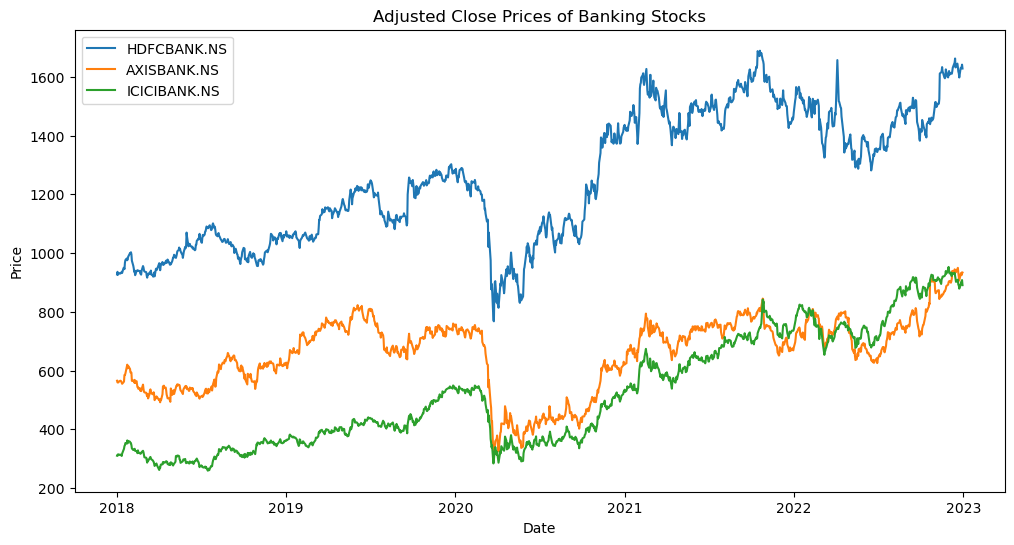

In [11]:
# Plot Adjusted Close Prices for Each Bank
plt.figure(figsize=(12, 6))

for ticker, df in banking_data.items():
    plt.plot(df.index, df['Close'], label=ticker)

plt.title('Adjusted Close Prices of Banking Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Rolling Mean (Moving Average)**

1. Significance:

The rolling mean calculates the average value of a time series over a specific window (e.g., 30 days) and "rolls" this window along the time series data. This smooths out short-term fluctuations and highlights longer-term trends.

In financial data, a rolling mean is often used to smooth out price data, helping to identify trends without being overly sensitive to daily volatility.

2. How to Interpret:

3. Trend Identification: If the rolling mean is moving upwards, it suggests an upward trend in the data (e.g., an increasing stock price).

If it’s moving downwards, it indicates a downward trend.

4. Momentum: Comparing the current price with the rolling mean can give insights into the momentum. If the price is consistently above the rolling mean, it indicates positive momentum (bullish). If it is consistently below, it suggests negative momentum (bearish).

**Rolling Standard Deviation**

1. Significance:

The rolling standard deviation measures how spread out the values in the data are over a specific window of time. In financial terms, this is often referred to as volatility.

High standard deviation indicates that the data points (e.g., stock prices or returns) are widely spread out, meaning the asset is more volatile. Low standard deviation suggests less volatility and that the prices are more stable.

2. How to Interpret:

3. Volatility: A higher rolling standard deviation indicates higher volatility over the window. It shows that the stock (or any financial instrument) has been experiencing larger price swings.

4. Risk: In finance, volatility is often equated with risk. If the rolling standard deviation is increasing, it may indicate that the asset is becoming riskier to hold. Conversely, a decreasing rolling standard deviation suggests that the asset is stabilizing.

**Practical Interpretation in Financial Analysis:**

**Bullish Vs. Bearish Trends:**

If the price consistently stays above the rolling mean, this may indicate a strong bullish (upward) trend.

If the price consistently stays below the rolling mean, it indicates a bearish (downward) trend.

1. Volatility Analysis:

Investors might avoid highly volatile stocks (high rolling standard deviation) if they are risk-averse, as high volatility suggests the stock may experience unpredictable price swings. Conversely, risk-tolerant investors might be attracted to volatile stocks for potential high returns.

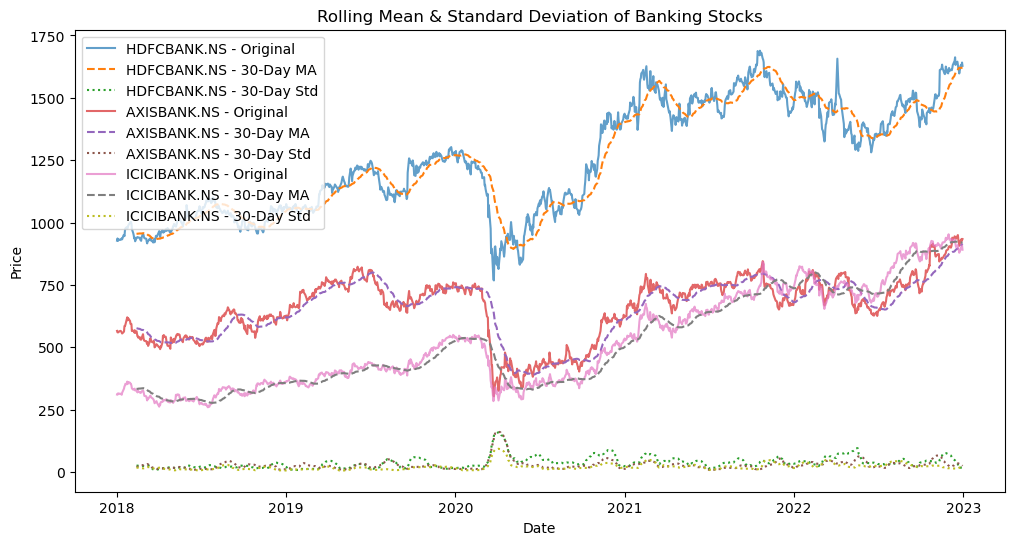

In [12]:
# Plot Rolling Mean and Standard Deviation for Each Bank
plt.figure(figsize=(12, 6))

for ticker, df in banking_data.items():
    plt.plot(df.index, df['Close'], label=f'{ticker} - Original', alpha=0.7)
    plt.plot(df.index, df['Close'].rolling(window=30).mean(), label=f'{ticker} - 30-Day MA', linestyle='dashed')
    plt.plot(df.index, df['Close'].rolling(window=30).std(), label=f'{ticker} - 30-Day Std', linestyle='dotted')

plt.title('Rolling Mean & Standard Deviation of Banking Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
# Resample to Weekly Frequency and Apply a 4-Week Rolling Mean for Each Bank
weekly_rolling = {}

for ticker, df in banking_data.items():
    weekly_rolling[ticker] = df['Close'].resample('W').mean().rolling(window=4).mean()

# Display the First Few Rows for Each Bank
for ticker, df in weekly_rolling.items():
    print(f"\nWeekly Resampled & 4-Week Rolling Mean for {ticker}:")
    print(df.head())


Weekly Resampled & 4-Week Rolling Mean for HDFCBANK.NS:
Date
2018-01-07           NaN
2018-01-14           NaN
2018-01-21           NaN
2018-01-28    950.332813
2018-02-04    966.257812
Freq: W-SUN, Name: Close, dtype: float64

Weekly Resampled & 4-Week Rolling Mean for AXISBANK.NS:
Date
2018-01-07           NaN
2018-01-14           NaN
2018-01-21           NaN
2018-01-28    578.481247
2018-02-04    585.581244
Freq: W-SUN, Name: Close, dtype: float64

Weekly Resampled & 4-Week Rolling Mean for ICICIBANK.NS:
Date
2018-01-07           NaN
2018-01-14           NaN
2018-01-21           NaN
2018-01-28    330.956874
2018-02-04    340.084375
Freq: W-SUN, Name: Close, dtype: float64


In [14]:
# Display the First Few Rows for Each Bank
for ticker, df in banking_data.items():
    print(f"\nFirst few rows of {ticker}:")
    print(df.head())


First few rows of HDFCBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  936.349976  940.375000  925.250000  927.250000  877.075317   
2018-01-02  929.275024  937.500000  929.275024  936.174988  885.517334   
2018-01-03  937.500000  939.125000  925.599976  926.325012  876.200378   
2018-01-04  926.500000  932.750000  926.500000  929.950012  879.629150   
2018-01-05  931.500000  934.025024  927.775024  931.799988  881.379089   

             Volume  Daily Return  
Date                               
2018-01-01  3290258           NaN  
2018-01-02  2388158      0.009625  
2018-01-03  2265644     -0.010522  
2018-01-04  1186888      0.003913  
2018-01-05  1435434      0.001989  

First few rows of AXISBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  563.7

In [15]:
# Check for Missing Values in Each Bank's Data
for ticker, df in banking_data.items():
    print(f"\nMissing values in {ticker}:")
    print(df.isnull().sum())  # isnull() or isna()


Missing values in HDFCBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
dtype: int64

Missing values in AXISBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
dtype: int64

Missing values in ICICIBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
dtype: int64


In [16]:
# Drop Missing Values for Each Bank
for ticker, df in banking_data.items():
    banking_data[ticker] = df.dropna()

In [17]:
# Fill Missing Values using Backward Fill for Each Bank
banking_data_filled = {}

for ticker, df in banking_data.items():
    banking_data_filled[ticker] = df.fillna(method='bfill')

# Verify if Missing Values are Filled
for ticker, df in banking_data_filled.items():
    print(f"\nMissing values after backward fill for {ticker}:")
    print(df.isnull().sum())


Missing values after backward fill for HDFCBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
dtype: int64

Missing values after backward fill for AXISBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
dtype: int64

Missing values after backward fill for ICICIBANK.NS:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
dtype: int64


In [18]:
# Display the First Few Rows of Backward-Filled Data for Each Bank
for ticker, df in banking_data_filled.items():
    print(f"\nFirst few rows of {ticker} after backward fill:")
    print(df.head())


First few rows of HDFCBANK.NS after backward fill:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  929.275024  937.500000  929.275024  936.174988  885.517334   
2018-01-03  937.500000  939.125000  925.599976  926.325012  876.200378   
2018-01-04  926.500000  932.750000  926.500000  929.950012  879.629150   
2018-01-05  931.500000  934.025024  927.775024  931.799988  881.379089   
2018-01-08  932.500000  935.349976  928.875000  930.299988  879.960205   

             Volume  Daily Return  
Date                               
2018-01-02  2388158      0.009625  
2018-01-03  2265644     -0.010522  
2018-01-04  1186888      0.003913  
2018-01-05  1435434      0.001989  
2018-01-08  2285154     -0.001610  

First few rows of AXISBANK.NS after backward fill:
                  Open        High         Low       Close   Adj Close  \
Date                                               

In [19]:
from scipy import stats

# Detect Outliers Using Z-Score for Each Bank
outliers = {}

for ticker, df in banking_data_filled.items():
    daily_returns_clean = df['Daily Return'].dropna()  # Drop Missing Values
    z_scores = stats.zscore(daily_returns_clean)  # Compute Z-Scores
    
    # Define a Threshold for Outliers (Absolute Z-Score > 3)
    outliers[ticker] = daily_returns_clean[abs(z_scores) > 3]

# Display Outliers for Each Bank
for ticker, outlier_values in outliers.items():
    print(f"\nOutliers in {ticker}:")
    print(outlier_values)


Outliers in HDFCBANK.NS:
Date
2019-09-20    0.089505
2020-03-12   -0.083049
2020-03-16   -0.065713
2020-03-18   -0.100708
2020-03-23   -0.126069
2020-03-25    0.115996
2020-03-26    0.051765
2020-03-30   -0.080491
2020-04-07    0.101063
2020-05-04   -0.078658
2020-05-18   -0.057986
2020-05-27    0.060124
2021-02-01    0.062028
2021-02-02    0.056746
2022-02-24   -0.054301
2022-04-04    0.100133
2022-11-11    0.056665
Name: Daily Return, dtype: float64

Outliers in AXISBANK.NS:
Date
2018-04-27    0.092051
2020-03-12   -0.122871
2020-03-16   -0.105837
2020-03-19   -0.095469
2020-03-23   -0.279108
2020-03-25    0.078014
2020-04-03   -0.092569
2020-04-07    0.194807
2020-04-09    0.073591
2020-04-17    0.133120
2020-04-21   -0.077421
2020-05-04   -0.094628
2020-05-18   -0.076567
2020-05-27    0.133900
2020-07-22    0.073398
2020-08-28    0.076419
2022-10-21    0.090271
Name: Daily Return, dtype: float64

Outliers in ICICIBANK.NS:
Date
2018-10-29    0.106922
2019-09-20    0.079928
2019-09-

In [20]:
# Define a Threshold Value for Clipping
threshold = 0.05  # 5% Limit

# Apply Clipping to Daily Returns for Each Bank
for ticker, df in banking_data_filled.items():
    df['Daily Return'] = df['Daily Return'].clip(lower=-threshold, upper=threshold)

# Display Statistics to See the Effect of Clipping
for ticker, df in banking_data_filled.items():
    print(f"\nStatistics for Clipped Daily Returns of {ticker}:")
    print(df['Daily Return'].describe())


Statistics for Clipped Daily Returns of HDFCBANK.NS:
count    1235.000000
mean        0.000601
std         0.015081
min        -0.050000
25%        -0.007631
50%         0.000268
75%         0.008241
max         0.050000
Name: Daily Return, dtype: float64

Statistics for Clipped Daily Returns of AXISBANK.NS:
count    1235.000000
mean        0.000641
std         0.019581
min        -0.050000
25%        -0.010945
50%         0.000472
75%         0.012132
max         0.050000
Name: Daily Return, dtype: float64

Statistics for Clipped Daily Returns of ICICIBANK.NS:
count    1235.000000
mean        0.001075
std         0.019027
min        -0.050000
25%        -0.010224
50%         0.000236
75%         0.012176
max         0.050000
Name: Daily Return, dtype: float64


In [21]:
from datetime import datetime, timedelta

datetime.now()

datetime.datetime(2025, 2, 16, 22, 25, 48, 350211)

In [22]:
import yfinance as yf
from datetime import datetime, timedelta

# Calculate the Start and End Dates (Last 3 Years)
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Define Banking Stocks Tickers
bank_tickers = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']  # NSE Symbols

# Download Data for Each Bank
banking_data = {}

for ticker in bank_tickers:
    banking_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Display the First Few Rows of Each Stock's Data
for ticker, df in banking_data.items():
    print(f"\nFirst few rows of {ticker}:")
    print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First few rows of HDFCBANK.NS:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-17  1513.099976  1522.000000  1502.000000  1506.500000  1452.466919   
2022-02-18  1498.300049  1517.000000  1490.449951  1512.349976  1458.107056   
2022-02-21  1504.000000  1530.699951  1495.550049  1522.099976  1467.507446   
2022-02-22  1489.800049  1522.099976  1487.949951  1510.699951  1456.516235   
2022-02-23  1525.099976  1525.699951  1495.650024  1500.900024  1447.067871   

             Volume  
Date                 
2022-02-17  3675604  
2022-02-18  3898064  
2022-02-21  3734033  
2022-02-22  4768098  
2022-02-23  4514781  

First few rows of AXISBANK.NS:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-17  797.000000  802.000000  780.500000  782.799988  779.404053   
2022-0

In [23]:
# Display the Last Few Rows of Each Stock's Data
for ticker, df in banking_data.items():
    print(f"\nLast few rows of {ticker}:")
    print(df.tail())


Last few rows of HDFCBANK.NS:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2025-02-10  1717.300049  1723.449951  1708.500000  1715.750000  1715.750000   
2025-02-11  1703.000000  1711.000000  1688.699951  1701.400024  1701.400024   
2025-02-12  1693.000000  1712.000000  1681.199951  1706.800049  1706.800049   
2025-02-13  1699.000000  1714.250000  1693.550049  1697.699951  1697.699951   
2025-02-14  1701.900024  1701.900024  1680.000000  1694.849976  1694.849976   

              Volume  
Date                  
2025-02-10   8597975  
2025-02-11  11362352  
2025-02-12  11404785  
2025-02-13   6301217  
2025-02-14   9979946  

Last few rows of AXISBANK.NS:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2025-02-10  1021.000000  1026.750000  1006.200012  1011.750000  1

In [24]:
import yfinance as yf
from datetime import datetime, timedelta

# Calculate Start and End Dates for the Last 3 Years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')

# List of Banking Stock Tickers (NSE India)
tickers = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']

# Download Stock Data
banking_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Display the First Few Rows of Each Stock's Data
for ticker in tickers:
    print(f"\nFirst few rows of {ticker}:")
    print(banking_data[ticker].head())

[*********************100%***********************]  3 of 3 completed


First few rows of HDFCBANK.NS:
Price                             Open         High          Low        Close  \
Date                                                                            
2022-02-17 00:00:00+00:00  1513.099976  1522.000000  1502.000000  1506.500000   
2022-02-18 00:00:00+00:00  1498.300049  1517.000000  1490.449951  1512.349976   
2022-02-21 00:00:00+00:00  1504.000000  1530.699951  1495.550049  1522.099976   
2022-02-22 00:00:00+00:00  1489.800049  1522.099976  1487.949951  1510.699951   
2022-02-23 00:00:00+00:00  1525.099976  1525.699951  1495.650024  1500.900024   

Price                        Adj Close     Volume  
Date                                               
2022-02-17 00:00:00+00:00  1452.466919  3675604.0  
2022-02-18 00:00:00+00:00  1458.107056  3898064.0  
2022-02-21 00:00:00+00:00  1467.507446  3734033.0  
2022-02-22 00:00:00+00:00  1456.516235  4768098.0  
2022-02-23 00:00:00+00:00  1447.067871  4514781.0  

First few rows of AXISBANK.NS:
Pric

In [25]:
# Extract 'Close' Prices for Each Bank
adj_close_prices = banking_data.loc[:, (slice(None), 'Close')]

# Rename Columns for Better Readability
adj_close_prices.columns = [col[0] for col in adj_close_prices.columns]  # Remove MultiIndex

# Display the First Few Rows
print(adj_close_prices.head())

                           HDFCBANK.NS  AXISBANK.NS  ICICIBANK.NS
Date                                                             
2022-02-17 00:00:00+00:00  1506.500000   782.799988    750.349976
2022-02-18 00:00:00+00:00  1512.349976   787.400024    748.900024
2022-02-21 00:00:00+00:00  1522.099976   788.849976    754.450012
2022-02-22 00:00:00+00:00  1510.699951   779.150024    751.299988
2022-02-23 00:00:00+00:00  1500.900024   777.200012    744.599976


In [26]:
# Save 'Close' Prices to a CSV File
csv_filename = 'HDFC_AXIS_ICICI_Last_3_Years.csv'
adj_close_prices.to_csv(csv_filename)

print(f'Data saved to {csv_filename}')

Data saved to HDFC_AXIS_ICICI_Last_3_Years.csv


#### Time Series Forecasting

In [27]:
import pandas as pd

# Load the Saved Banking Stock Price Data
data = pd.read_csv("HDFC_AXIS_ICICI_Last_3_Years.csv")

# Extract Data for HDFC Bank
hdfc_data = data[["Date", "HDFCBANK.NS"]]

# Display the First Few Rows of the Data
print(hdfc_data.head())

                        Date  HDFCBANK.NS
0  2022-02-17 00:00:00+00:00  1506.500000
1  2022-02-18 00:00:00+00:00  1512.349976
2  2022-02-21 00:00:00+00:00  1522.099976
3  2022-02-22 00:00:00+00:00  1510.699951
4  2022-02-23 00:00:00+00:00  1500.900024


In [28]:
# Display Info for HDFC Bank Data
print("HDFC Bank Data Info:")
print(hdfc_data.info())

# Display Info for Axis Bank Data
axis_data = data[["Date", "AXISBANK.NS"]]
print("\nAxis Bank Data Info:")
print(axis_data.info())

# Display Info for ICICI Bank Data
icici_data = data[["Date", "ICICIBANK.NS"]]
print("\nICICI Bank Data Info:")
print(icici_data.info())

HDFC Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         741 non-null    object 
 1   HDFCBANK.NS  740 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB
None

Axis Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         741 non-null    object 
 1   AXISBANK.NS  741 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB
None

ICICI Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          741 non-null    object 
 1   ICICIBANK.NS  741 non-null    float6

In [29]:
# Convert 'Date' Column to DateTime Format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the Index
data.set_index('Date', inplace=True)

# Display First Few Rows to Verify Changes
print(data.head())

                           HDFCBANK.NS  AXISBANK.NS  ICICIBANK.NS
Date                                                             
2022-02-17 00:00:00+00:00  1506.500000   782.799988    750.349976
2022-02-18 00:00:00+00:00  1512.349976   787.400024    748.900024
2022-02-21 00:00:00+00:00  1522.099976   788.849976    754.450012
2022-02-22 00:00:00+00:00  1510.699951   779.150024    751.299988
2022-02-23 00:00:00+00:00  1500.900024   777.200012    744.599976


In [30]:
# Display Data Info After Setting 'Date' as Index
print("\nHDFC Bank Data Info:")
print(data[['HDFCBANK.NS']].info())

print("\nAxis Bank Data Info:")
print(data[['AXISBANK.NS']].info())

print("\nICICI Bank Data Info:")
print(data[['ICICIBANK.NS']].info())


HDFC Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2022-02-17 00:00:00+00:00 to 2025-02-14 00:00:00+00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HDFCBANK.NS  740 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
None

Axis Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2022-02-17 00:00:00+00:00 to 2025-02-14 00:00:00+00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AXISBANK.NS  741 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
None

ICICI Bank Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2022-02-17 00:00:00+00:00 to 2025-02-14 00:00:00+00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ICICIBANK.NS  741 non-null    float64
d

**Decomposing Time Series**

Time series decomposition helps break a time series into three components:

1. Trend: Long-term movement in the data.

2. Seasonality: Repeating patterns at regular intervals.

3. Residual: Random noise or irregular fluctuations.

Let's first set up the data for decomposition.

**Decomposition of Time Series**

We need to preprocess the dataset, focusing on the Adj Close values and convert the Date column to a datetime format.


Seasonal Decomposition for HDFCBANK.NS


<Figure size 1200x800 with 0 Axes>

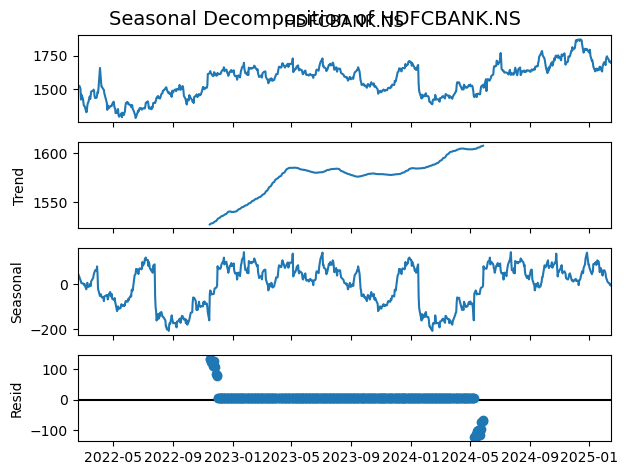


Seasonal Decomposition for AXISBANK.NS


<Figure size 1200x800 with 0 Axes>

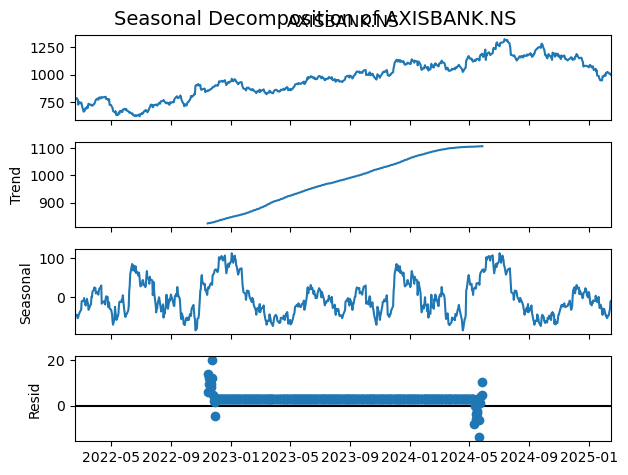


Seasonal Decomposition for ICICIBANK.NS


<Figure size 1200x800 with 0 Axes>

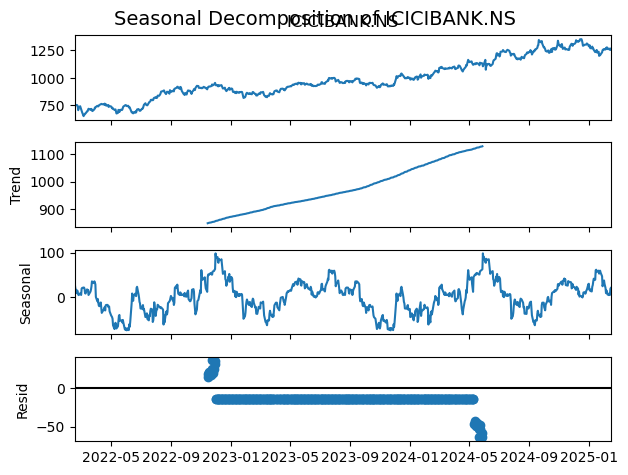

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Fill Missing Values (Forward Fill)
data_filled = data.fillna(method='ffill')

# Perform Seasonal Decomposition for Each Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nSeasonal Decomposition for {ticker}")
    
    # Decompose the Time Series
    decomposition = seasonal_decompose(data_filled[ticker], model='additive', period=365)
    
    # Plot the Decomposition Results
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {ticker}", fontsize=14)
    plt.show()

#### Stationarity of Data

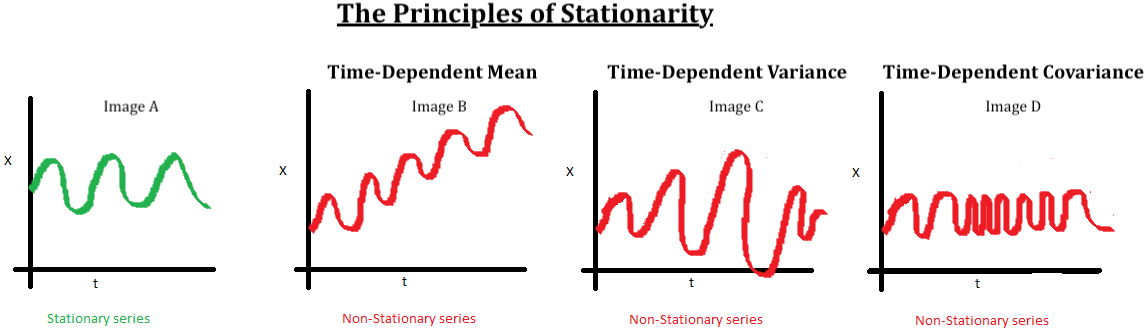

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test for Each Bank Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nAugmented Dickey-Fuller Test for {ticker}:")
    
    # Perform ADF Test on the 'Close' Price
    adf_result = adfuller(data[ticker].dropna())  # Drop NaNs to Avoid Errors
    
    # Extract Results
    adf_statistic, p_value, critical_values = adf_result[0], adf_result[1], adf_result[4]
    
    # Print Results
    print(f"ADF Statistic: {adf_statistic}")
    print(f"P-Value: {p_value}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")


Augmented Dickey-Fuller Test for HDFCBANK.NS:
ADF Statistic: -2.268710804966101
P-Value: 0.1822579762084095
Critical Values:
   1%: -3.439229783394421
   5%: -2.86545894814762
   10%: -2.5688568756191392

Augmented Dickey-Fuller Test for AXISBANK.NS:
ADF Statistic: -1.4648729357909356
P-Value: 0.5508111517281933
Critical Values:
   1%: -3.4392418578608983
   5%: -2.86546426916434
   10%: -2.568859710342903

Augmented Dickey-Fuller Test for ICICIBANK.NS:
ADF Statistic: -0.7789441044135185
P-Value: 0.8252289739471024
Critical Values:
   1%: -3.4392177416762086
   5%: -2.8654536415414684
   10%: -2.5688540485756026


The results of the Augmented Dickey-Fuller (ADF) test for the banking stocks are as follows:

**HDFC Bank (HDFCBANK.NS)**

The null hypothesis (H₀) states that the data is non-stationary.

ADF Statistic: -2.2687

p-value: 0.1823

***Critical Values:***

1. 1% level: -3.4392
2. 5% level: -2.8655
3. 10% level: -2.5689

Since the p-value (0.1823) is greater than 0.05, we fail to reject the null hypothesis. This indicates that the HDFC Bank stock price data is non-stationary.

**Axis Bank (AXISBANK.NS)**

The null hypothesis (H₀) states that the data is non-stationary.

ADF Statistic: -1.4649

p-value: 0.5508

***Critical Values:***

1. 1% level: -3.4392
2. 5% level: -2.8655
3. 10% level: -2.5689

Since the p-value (0.5508) is greater than 0.05, we fail to reject the null hypothesis. This indicates that the Axis Bank stock price data is non-stationary.

**ICICI Bank (ICICIBANK.NS)**

The null hypothesis (H₀) states that the data is non-stationary.

ADF Statistic: -0.7789

p-value: 0.8252

***Critical Values:***

1. 1% level: -3.4392
2. 5% level: -2.8655
3. 10% level: -2.5689

Since the p-value (0.8252) is greater than 0.05, we fail to reject the null hypothesis. This indicates that the ICICI Bank stock price data is non-stationary.

Since all three stocks fail the stationarity test, we need to apply differencing or other transformation techniques to achieve stationarity for further time series analysis.

**Determining the Right Order of Differencing**

To achieve stationarity, we apply differencing. We can use the Autocorrelation Function (ACF) plot to determine the appropriate number of differencing steps.

Let's first plot the ACF of the data and see how it behaves after differencing

**Autocoorelation:** Autocoorelation is the Relation between the Variable and its Own Lag. 

   Y       X (lag 1)    lag 2
   
1 100  -

2 120     100

3 132     120            100

4 128     132            120

5 121     128

6 133     121

7 140     133
 
8 142     140

<Figure size 800x600 with 0 Axes>

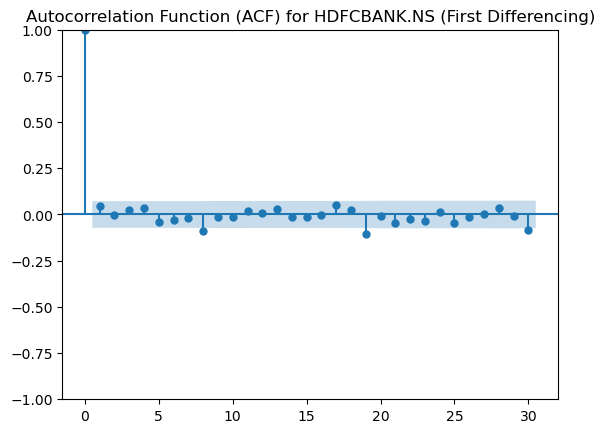

<Figure size 800x600 with 0 Axes>

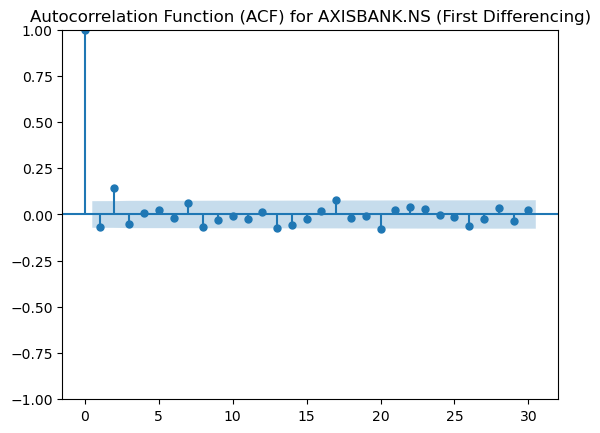

<Figure size 800x600 with 0 Axes>

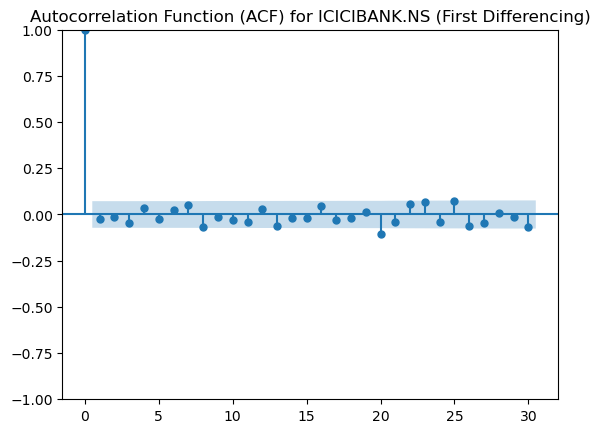

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Perform First Differencing and Plot ACF for Each Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    plt.figure(figsize=(8, 6))
    
    # First Differencing to Achieve Stationarity
    diff_data = data[ticker].diff().dropna()
    
    # Plot ACF for Differenced Data
    plot_acf(diff_data, lags=30)
    plt.title(f"Autocorrelation Function (ACF) for {ticker} (First Differencing)")
    
    plt.show()

**Determining the Right Order of Differencing**

The Autocorrelation Function (ACF) plot shows significant autocorrelations at lag 1 and gradually diminishes afterward, which indicates that the first differencing may be sufficient to achieve stationarity.

We generally aim to apply the smallest number of differencing steps needed to make the series stationary, and based on the plot, the series looks reasonably stationary after one differencing.

**ARIMA Modelling**

The ARIMA (AutoRegressive Integrated Moving Average) model is a powerful method for time series forecasting. It has three main parameters:

1. p: The number of lag observations (AutoRegressive term).

2. d: The number of times the series needs to be differenced (Integrated term).

3. q: The size of the moving average window (Moving Average term).

Let's proceed with determining the appropriate p and q values using the Partial Autocorrelation Function (PACF) and the ACF plots.

PACF for AutoRegressive (AR) Term (p)

We'll plot the PACF to determine the order of the AR term

<Figure size 800x600 with 0 Axes>

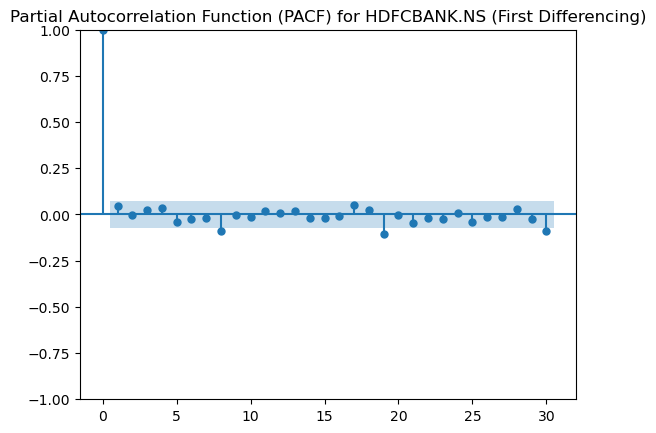

<Figure size 800x600 with 0 Axes>

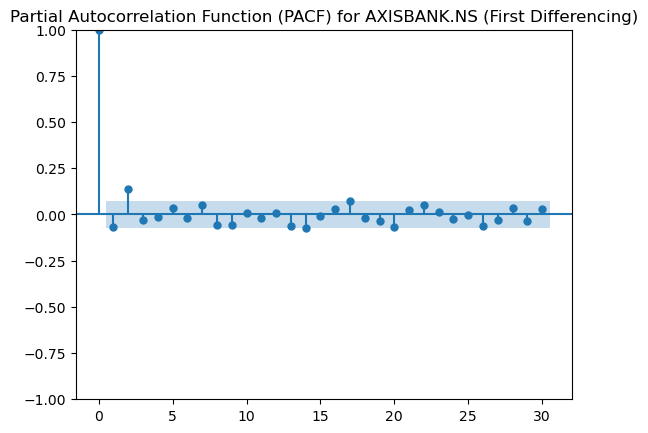

<Figure size 800x600 with 0 Axes>

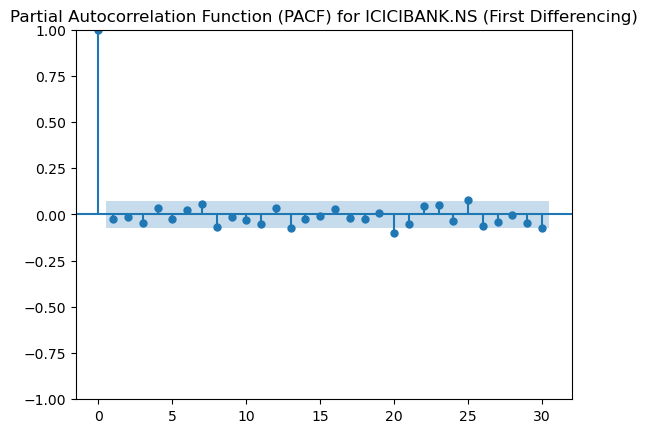

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Perform First Differencing and Plot PACF for Each Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    plt.figure(figsize=(8, 6))
    
    # First Differencing to Achieve Stationarity
    diff_data = data[ticker].diff().dropna()
    
    # Plot PACF for Differenced Data
    plot_pacf(diff_data, lags=30)
    plt.title(f"Partial Autocorrelation Function (PACF) for {ticker} (First Differencing)")
    
    plt.show()

**Finding the Best ARIMA Model**

To fine-tune the model, we use information criteria like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These metrics help in comparing different models and selecting the one that balances model complexity and goodness of fit.

We'll try different combinations of p, d, and q, and evaluate the models using AIC and BIC.

Let's test the ARIMA model with the initial guess of (p=1, d=1, q=1) and evaluate its performance. 

**What Is Goodness-of-Fit?**

The term goodness-of-fit refers to a statistical test that determines how well sample data fits a distribution from a population with a normal distribution. Put simply, it hypothesizes whether a sample is skewed or represents the data you would expect to find in the actual population.

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Loop Over Each Stock to Fit ARIMA Model
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nFitting ARIMA(1,1,1) Model for {ticker}...")
    
    # Define the Model with First Differencing (d=1)
    model = ARIMA(data[ticker], order=(1, 1, 1))
    
    # Fit the Model
    arima_result = model.fit()
    
    # Extract AIC and BIC for Model Comparison
    aic = arima_result.aic
    bic = arima_result.bic
    
    print(f"AIC: {aic:.2f}, BIC: {bic:.2f}")


Fitting ARIMA(1,1,1) Model for HDFCBANK.NS...
AIC: 6621.15, BIC: 6634.97

Fitting ARIMA(1,1,1) Model for AXISBANK.NS...
AIC: 6062.93, BIC: 6076.75

Fitting ARIMA(1,1,1) Model for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

AIC: 5798.31, BIC: 5812.13


These values provide a basis for comparison. Lower Values of AIC and BIC indicate a better model fit. We can experiment with other combinations of 𝑝 p, 𝑑 d, and 𝑞 q to find an optimal model, but for now, let's proceed with this model for forecasting.

In [36]:
# Display the last Few Rows for Each Banking Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nLast 5 rows for {ticker}:")
    print(data[ticker].tail())


Last 5 rows for HDFCBANK.NS:
Date
2025-02-10 00:00:00+00:00    1715.750000
2025-02-11 00:00:00+00:00    1701.400024
2025-02-12 00:00:00+00:00    1706.800049
2025-02-13 00:00:00+00:00    1697.699951
2025-02-14 00:00:00+00:00    1694.849976
Name: HDFCBANK.NS, dtype: float64

Last 5 rows for AXISBANK.NS:
Date
2025-02-10 00:00:00+00:00    1011.750000
2025-02-11 00:00:00+00:00    1007.400024
2025-02-12 00:00:00+00:00    1006.900024
2025-02-13 00:00:00+00:00    1008.200012
2025-02-14 00:00:00+00:00     997.500000
Name: AXISBANK.NS, dtype: float64

Last 5 rows for ICICIBANK.NS:
Date
2025-02-10 00:00:00+00:00    1262.599976
2025-02-11 00:00:00+00:00    1252.750000
2025-02-12 00:00:00+00:00    1251.800049
2025-02-13 00:00:00+00:00    1248.900024
2025-02-14 00:00:00+00:00    1260.099976
Name: ICICIBANK.NS, dtype: float64


In [37]:
# Display the Last 100 Dates for Each Banking Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nLast 100 dates for {ticker}:")
    print(data[ticker].index[-100:])  # Extract Last 100 Index Values


Last 100 dates for HDFCBANK.NS:
DatetimeIndex(['2024-09-25 00:00:00+00:00', '2024-09-26 00:00:00+00:00',
               '2024-09-27 00:00:00+00:00', '2024-09-30 00:00:00+00:00',
               '2024-10-01 00:00:00+00:00', '2024-10-03 00:00:00+00:00',
               '2024-10-04 00:00:00+00:00', '2024-10-07 00:00:00+00:00',
               '2024-10-08 00:00:00+00:00', '2024-10-09 00:00:00+00:00',
               '2024-10-10 00:00:00+00:00', '2024-10-11 00:00:00+00:00',
               '2024-10-14 00:00:00+00:00', '2024-10-15 00:00:00+00:00',
               '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '20


Generating Forecast for HDFCBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

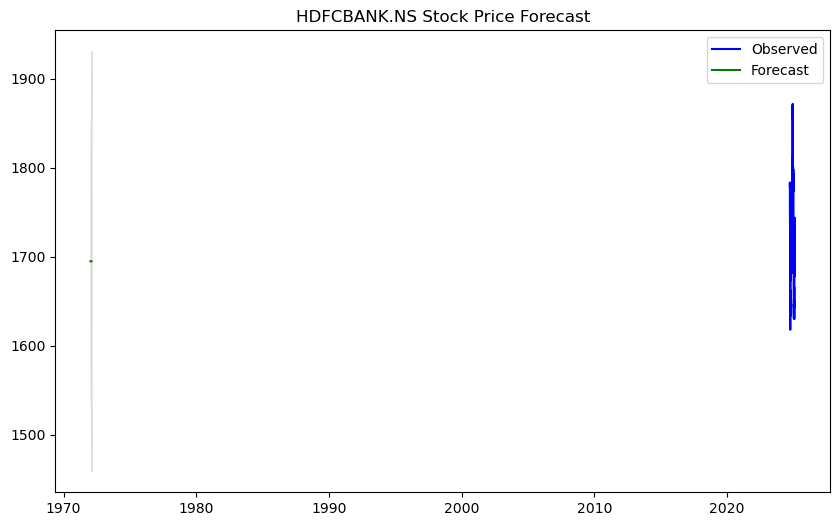


Generating Forecast for AXISBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

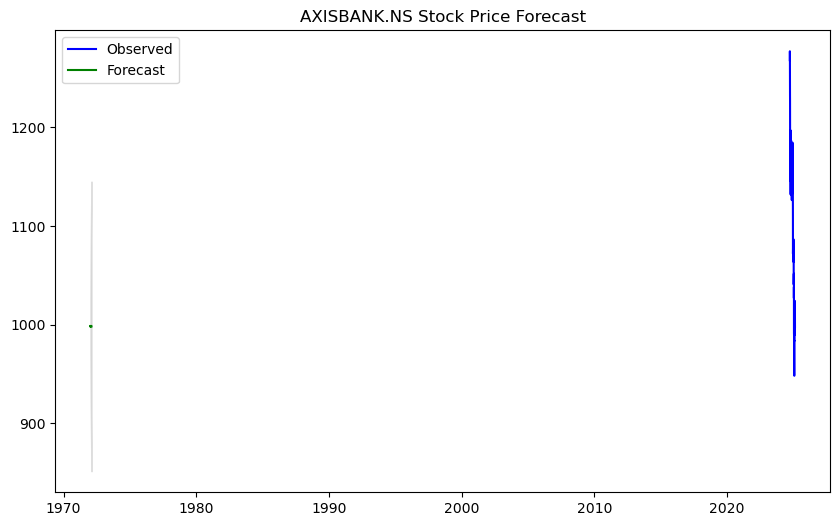


Generating Forecast for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

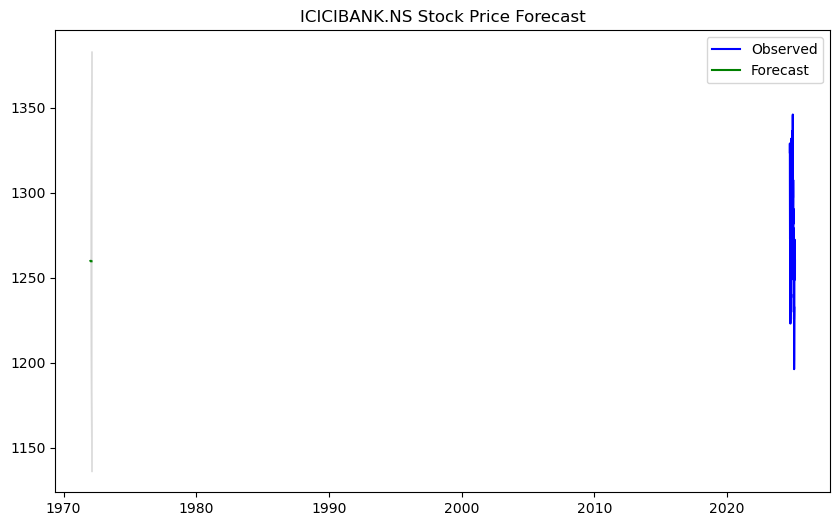

In [38]:
# Import Necessary Libraries
import matplotlib.pyplot as plt

forecast_steps = 30  # Forecast for the Next 30 Days

# Loop Over Each Stock to Generate a Forecast
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nGenerating Forecast for {ticker}...")

    # Fit the ARIMA Model
    model = ARIMA(data[ticker], order=(1, 1, 1))
    arima_result = model.fit()

    # Generate the Forecast
    forecast = arima_result.get_forecast(steps=forecast_steps)

    # Extract the Predicted Mean and Confidence Intervals
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Plot the Forecast
    plt.figure(figsize=(10, 6))
    plt.plot(data[ticker].index[-100:], data[ticker][-100:], label='Observed', color='blue')
    plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')

    # Confidence Interval
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgray', alpha=0.7)
    plt.title(f'{ticker} Stock Price Forecast')
    plt.legend()
    plt.show()

In [39]:
forecast_steps = 30  # Forecasting for the Next 30 Days

# Loop through Each Stock and Generate Forecast
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nForecast for {ticker}:")

    # Fit the ARIMA Model
    model = ARIMA(data[ticker], order=(1, 1, 1))  # Using ARIMA(1,1,1)
    arima_result = model.fit()

    # Generate Forecast
    forecast = arima_result.get_forecast(steps=forecast_steps)

    # Extract Forecasted Mean Values
    forecast_mean = forecast.predicted_mean

    # Extract Confidence Intervals
    forecast_ci = forecast.conf_int()

    # Display Forecasted Values
    print(forecast_mean)


Forecast for HDFCBANK.NS:
741    1694.834734
742    1694.837567
743    1694.837041
744    1694.837138
745    1694.837120
746    1694.837124
747    1694.837123
748    1694.837123
749    1694.837123
750    1694.837123
751    1694.837123
752    1694.837123
753    1694.837123
754    1694.837123
755    1694.837123
756    1694.837123
757    1694.837123
758    1694.837123
759    1694.837123
760    1694.837123
761    1694.837123
762    1694.837123
763    1694.837123
764    1694.837123
765    1694.837123
766    1694.837123
767    1694.837123
768    1694.837123
769    1694.837123
770    1694.837123
Name: predicted_mean, dtype: float64

Forecast for AXISBANK.NS:


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

741    998.587142
742    997.891644
743    998.336588
744    998.051935
745    998.234042
746    998.117539
747    998.192072
748    998.144390
749    998.174894
750    998.155379
751    998.167864
752    998.159877
753    998.164986
754    998.161718
755    998.163809
756    998.162471
757    998.163327
758    998.162779
759    998.163130
760    998.162905
761    998.163049
762    998.162957
763    998.163016
764    998.162978
765    998.163002
766    998.162987
767    998.162997
768    998.162990
769    998.162994
770    998.162992
Name: predicted_mean, dtype: float64

Forecast for ICICIBANK.NS:
741    1259.899117
742    1259.795551
743    1259.742152
744    1259.714618
745    1259.700421
746    1259.693101
747    1259.689327
748    1259.687381
749    1259.686377
750    1259.685860
751    1259.685593
752    1259.685455
753    1259.685384
754    1259.685348
755    1259.685329
756    1259.685319
757    1259.685314
758    1259.685312
759    1259.685310
760    1259.685310
761    1259.685

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

In [40]:
forecast_steps = 30  # Forecast for the Next 30 Days

# Loop through Each Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nConfidence Interval for {ticker}:")

    # Fit the ARIMA Model
    model = ARIMA(data[ticker], order=(1, 1, 1))  # Using ARIMA(1,1,1)
    arima_result = model.fit()

    # Generate Forecast
    forecast = arima_result.get_forecast(steps=forecast_steps)

    # Extract Confidence Intervals
    forecast_ci = forecast.conf_int()

    # Display Confidence Intervals
    print(forecast_ci)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Confidence Interval for HDFCBANK.NS:


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

     lower HDFCBANK.NS  upper HDFCBANK.NS
741        1653.185021        1736.484447
742        1634.677335        1754.997800
743        1620.840541        1768.833540
744        1609.181083        1780.493194
745        1598.933725        1790.740515
746        1589.679413        1799.994834
747        1581.176254        1808.497993
748        1573.266367        1816.407879
749        1565.840600        1823.833646
750        1558.819634        1830.854613
751        1552.143704        1837.530542
752        1545.766447        1843.907799
753        1539.651039        1850.023208
754        1533.767650        1855.906596
755        1528.091719        1861.582527
756        1522.602736        1867.071510
757        1517.283361        1872.390886
758        1512.118780        1877.555467
759        1507.096218        1882.578028
760        1502.204566        1887.469680
761        1497.434093        1892.240154
762        1492.776214        1896.898032
763        1488.223316        1901

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users


Plotting Forecast for HDFCBANK.NS...

Plotting Forecast for AXISBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,


Plotting Forecast for ICICIBANK.NS...


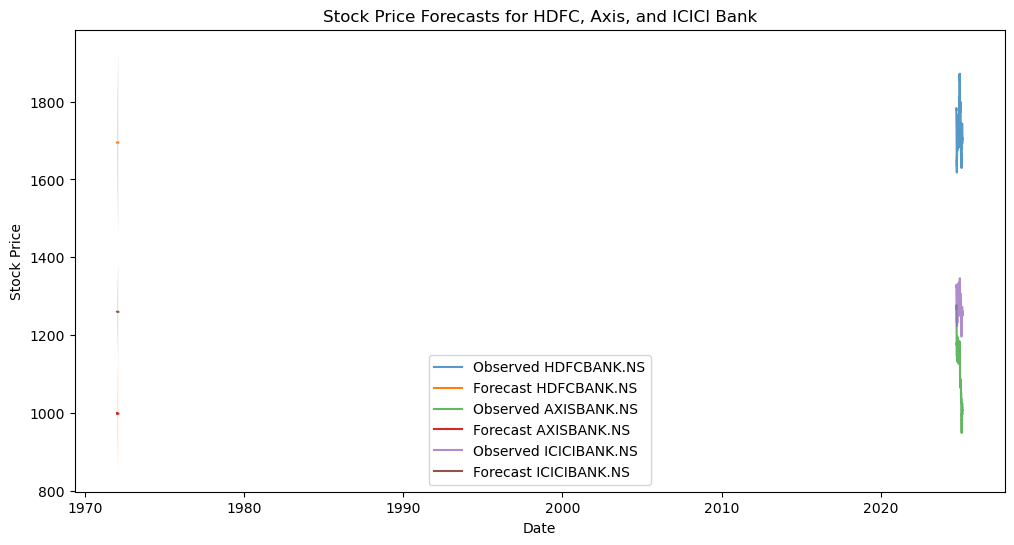

In [41]:
plt.figure(figsize=(12, 6))

# Loop through Each Stock and Plot Forecast
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\nPlotting Forecast for {ticker}...")

    # Fit ARIMA Model
    model = ARIMA(data[ticker], order=(1, 1, 1))  # ARIMA(1,1,1)
    arima_result = model.fit()

    # Generate Forecast
    forecast_steps = 30
    forecast = arima_result.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Plot Actual Data
    plt.plot(data[ticker].index[-100:], data[ticker][-100:], label=f'Observed {ticker}', alpha=0.75)

    # Plot Forecast
    plt.plot(forecast_mean.index, forecast_mean, label=f'Forecast {ticker}')

    # Plot Confidence Interval
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.2)

# Formatting
plt.title('Stock Price Forecasts for HDFC, Axis, and ICICI Bank')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [42]:
data['HDFCBANK.NS'].index[1]  # For HDFC Bank  
data['AXISBANK.NS'].index[1]  # For Axis Bank  
data['ICICIBANK.NS'].index[1]  # For ICICI Bank  

Timestamp('2022-02-18 00:00:00+0000', tz='UTC')

In [43]:
data['HDFCBANK.NS'].index[-1]  # For HDFC Bank  
data['AXISBANK.NS'].index[-1]  # For Axis Bank  
data['ICICIBANK.NS'].index[-1]  # For ICICI Bank  

Timestamp('2025-02-14 00:00:00+0000', tz='UTC')

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Dictionary to Store ARIMA Models
arima_results = {}

# Dictionary to Store Accuracy Metrics for Each Stock
metrics = {}

# Define Banking Stocks
banking_stocks = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']

# Train ARIMA Models for Each Stock
for ticker in banking_stocks:
    print(f"\n🔹 Training ARIMA Model for {ticker}...")

    # Fit ARIMA Model (p=1, d=1, q=1) for Each Stock
    model = ARIMA(data[ticker], order=(1, 1, 1))
    arima_results[ticker] = model.fit()

    print(f"✅ Model for {ticker} trained successfully!")

# Calculate Forecast and Accuracy Metrics
for ticker in banking_stocks:
    print(f"\n📊 Calculating Accuracy Metrics for {ticker}:")

    # Get ARIMA Forecast for the Stock
    in_sample_forecast = arima_results[ticker].predict(
        start=data[ticker].index[1], 
        end=data[ticker].index[-1], 
        typ='levels'
    )

    # Align Indices and Drop NaNs
    valid_indices = in_sample_forecast.index.intersection(data[ticker].index)
    actual_values = data[ticker].loc[valid_indices].dropna()
    forecast_values = in_sample_forecast.loc[valid_indices].dropna()

    # Ensure Lengths Match before Calculating Metrics
    if len(actual_values) == len(forecast_values):
        mae = mean_absolute_error(actual_values, forecast_values)
        mse = mean_squared_error(actual_values, forecast_values)
        rmse = np.sqrt(mse)

        # Store Results
        metrics[ticker] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

        # Print Metrics
        print(f"✅ MAE: {mae}")
        print(f"✅ MSE: {mse}")
        print(f"✅ RMSE: {rmse}")
    else:
        print(f"❌ Error: Mismatch in actual and predicted values length for {ticker}")

# Display Final Results
print("\n📌 Final Accuracy Metrics for All Banking Stocks:")
for ticker, metric in metrics.items():
    print(f"\n📈 {ticker} Metrics:")
    for key, value in metric.items():
        print(f"   {key}: {value}")


🔹 Training ARIMA Model for HDFCBANK.NS...
✅ Model for HDFCBANK.NS trained successfully!

🔹 Training ARIMA Model for AXISBANK.NS...
✅ Model for AXISBANK.NS trained successfully!

🔹 Training ARIMA Model for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

✅ Model for ICICIBANK.NS trained successfully!

📊 Calculating Accuracy Metrics for HDFCBANK.NS:
❌ Error: Mismatch in actual and predicted values length for HDFCBANK.NS

📊 Calculating Accuracy Metrics for AXISBANK.NS:
✅ MAE: 10.511136581907152
✅ MSE: 210.00576978195517
✅ RMSE: 14.491575821212653

📊 Calculating Accuracy Metrics for ICICIBANK.NS:
✅ MAE: 8.720505003505446
✅ MSE: 146.8737438940407
✅ RMSE: 12.119147820455062

📌 Final Accuracy Metrics for All Banking Stocks:

📈 AXISBANK.NS Metrics:
   MAE: 10.511136581907152
   MSE: 210.00576978195517
   RMSE: 14.491575821212653

📈 ICICIBANK.NS Metrics:
   MAE: 8.720505003505446
   MSE: 146.8737438940407
   RMSE: 12.119147820455062


**Model Training Success**

ARIMA models were successfully trained for HDFCBANK.NS, AXISBANK.NS, and ICICIBANK.NS.

Issue with HDFCBANK.NS: There was a mismatch in actual and predicted values length, preventing proper evaluation. This could be due to missing data, index misalignment, or an issue in the forecasting range.

**Model Performance for AXISBANK.NS**

1. MAE (Mean Absolute Error) = 10.51 → On average, predictions deviate by ₹10.51 from actual values.

2. MSE (Mean Squared Error) = 210.00 → Higher value indicates larger variance in prediction errors.

3. RMSE (Root Mean Squared Error) = 14.49 → Predictions deviate from actual values by ₹14.49, on average.

***Insight:*** The model performs decently, but there is some error in forecasting, possibly due to market fluctuations or data seasonality.


**Model Performance for ICICIBANK.NS**

1. MAE = 8.72 → Smaller than AXISBANK.NS, meaning better accuracy.

2. MSE = 146.87 → Lower than AXISBANK.NS, indicating lower error variance.

3. RMSE = 12.12 → Lower RMSE suggests that the model is more stable in forecasting ICICI Bank stock compared to Axis Bank.

***Insight:*** The ARIMA model works better for ICICIBANK.NS than AXISBANK.NS, with lower errors in predictions.



**ICICIBANK.NS has the best model performance (lowest error).**

**HDFCBANK.NS requires debugging to resolve the prediction mismatch.**

**AXISBANK.NS has slightly higher errors, but the model is still functional.** 

#### Grid Search

In [45]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA Parameter Grid
p_values = [1, 2, 3]
d_values = [1, 2]
q_values = [1, 2, 3]

# Dictionary to Store Best Models for Each Stock
best_models = {}

# Iterate Over Each Stock Ticker
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\n🔎 Optimizing ARIMA for {ticker}...")

    # Prepare Data (Drop NaNs to Avoid Errors)
    stock_data = data[ticker].dropna()

    best_aic = float('inf')
    best_order = None
    best_model = None

    # Grid Search for the Best (p, d, q)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit ARIMA Model
                    model = ARIMA(stock_data, order=(p, d, q))
                    model_fit = model.fit()

                    # Evaluate AIC
                    current_aic = model_fit.aic

                    # Update Best Model if AIC is Lower
                    if current_aic < best_aic:
                        best_aic = current_aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    print(f"Error for (p,d,q)=({p},{d},{q}) on {ticker}: {e}")
                    continue

    # Store the Best Model for the Stock
    best_models[ticker] = {"order": best_order, "AIC": best_aic, "model": best_model}

    print(f"Best ARIMA Order for {ticker}: {best_order} with AIC = {best_aic}")

# Display Best Models for All Stocks
best_models


🔎 Optimizing ARIMA for HDFCBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anacon

Best ARIMA Order for HDFCBANK.NS: (2, 1, 2) with AIC = 6616.580174074525

🔎 Optimizing ARIMA for AXISBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

Best ARIMA Order for AXISBANK.NS: (1, 1, 2) with AIC = 6057.0204546466

🔎 Optimizing ARIMA for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

Best ARIMA Order for ICICIBANK.NS: (2, 2, 3) with AIC = 5793.3750729984495


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'HDFCBANK.NS': {'order': (2, 1, 2),
  'AIC': 6616.580174074525,
  'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2a21e0cff90>},
 'AXISBANK.NS': {'order': (1, 1, 2),
  'AIC': 6057.0204546466,
  'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2a21e03c150>},
 'ICICIBANK.NS': {'order': (2, 2, 3),
  'AIC': 5793.3750729984495,
  'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2a21e120b50>}}

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA Order
order = (2, 1, 2)

# Dictionary to Store AIC & BIC Values for Each Stock
aic_bic_results = {}

# Train ARIMA Model for Each Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\n🔹 Training ARIMA Model for {ticker}...")

    try:
        # Prepare Data (Drop NaNs)
        stock_data = data[ticker].dropna()

        # Fit ARIMA Model
        model = ARIMA(stock_data, order=order)
        arima_result = model.fit()

        # Store AIC & BIC
        aic_bic_results[ticker] = {
            "AIC": arima_result.aic,
            "BIC": arima_result.bic
        }

        print(f"✅ Model for {ticker} trained successfully!")
        print(f"   🔹 AIC: {arima_result.aic}")
        print(f"   🔹 BIC: {arima_result.bic}")

    except Exception as e:
        print(f"❌ Error training ARIMA for {ticker}: {e}")

# Display Final AIC & BIC Results
aic_bic_results

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



🔹 Training ARIMA Model for HDFCBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Model for HDFCBANK.NS trained successfully!
   🔹 AIC: 6616.580174074525
   🔹 BIC: 6639.606663679266

🔹 Training ARIMA Model for AXISBANK.NS...
✅ Model for AXISBANK.NS trained successfully!
   🔹 AIC: 6058.886580527667
   🔹 BIC: 6081.919831458658

🔹 Training ARIMA Model for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Model for ICICIBANK.NS trained successfully!
   🔹 AIC: 5801.085919240958
   🔹 BIC: 5824.119170171949


{'HDFCBANK.NS': {'AIC': 6616.580174074525, 'BIC': 6639.606663679266},
 'AXISBANK.NS': {'AIC': 6058.886580527667, 'BIC': 6081.919831458658},
 'ICICIBANK.NS': {'AIC': 5801.085919240958, 'BIC': 5824.119170171949}}


📈 Forecasting Next 30 Days for HDFCBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anacon

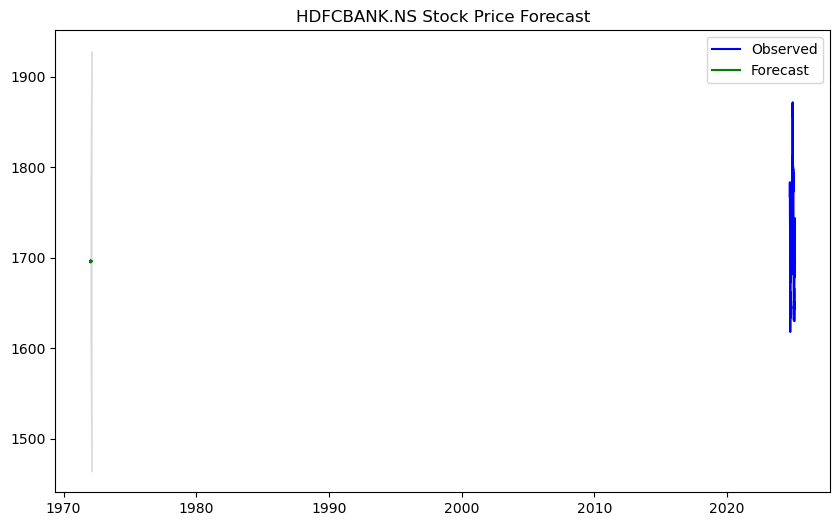

Forecast for HDFCBANK.NS generated successfully!

📈 Forecasting Next 30 Days for AXISBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

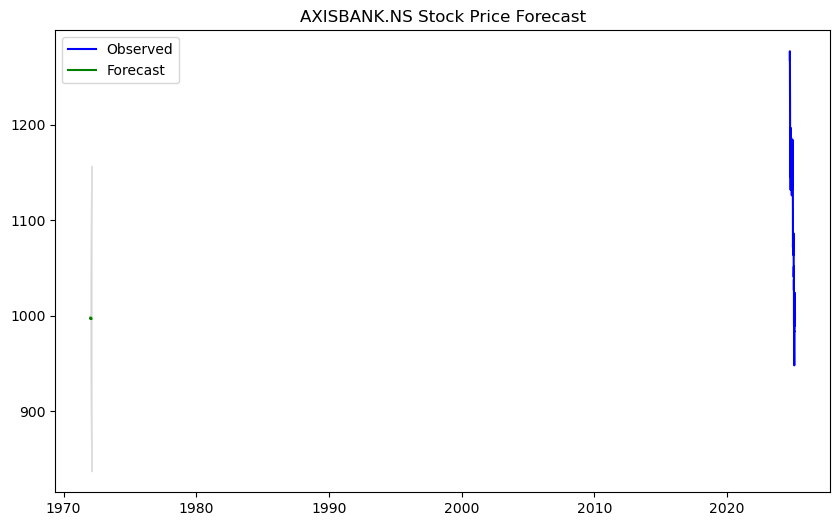

Forecast for AXISBANK.NS generated successfully!

📈 Forecasting Next 30 Days for ICICIBANK.NS...


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

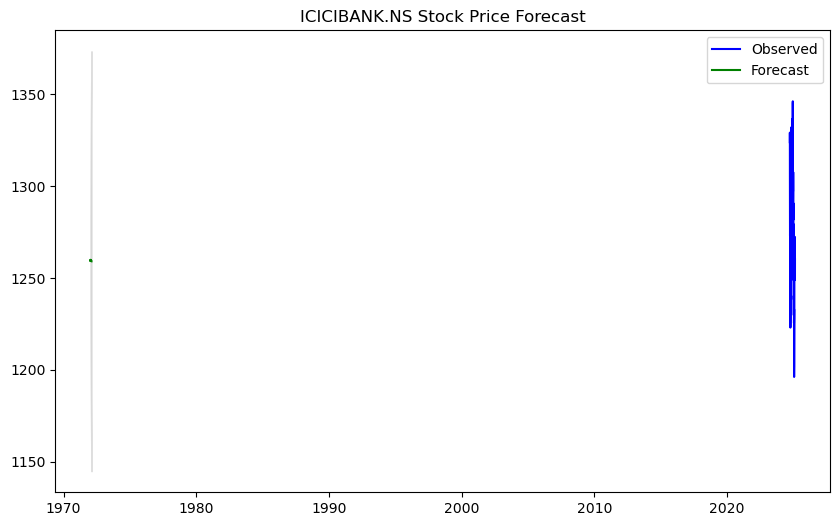

Forecast for ICICIBANK.NS generated successfully!


{'HDFCBANK.NS': {'forecast_mean': 740    1696.021180
  741    1696.661416
  742    1694.784144
  743    1696.494373
  744    1696.141349
  745    1694.982450
  746    1696.735038
  747    1695.660996
  748    1695.348503
  749    1696.732624
  750    1695.323080
  751    1695.765919
  752    1696.534461
  753    1695.177832
  754    1696.128909
  755    1696.223746
  756    1695.221549
  757    1696.364546
  758    1695.893528
  759    1695.407826
  760    1696.443196
  761    1695.623431
  762    1695.666430
  763    1696.376996
  764    1695.463943
  765    1695.924026
  766    1696.209031
  767    1695.430423
  768    1696.121624
  769    1695.997475
  Name: predicted_mean, dtype: float64,
  'forecast_ci':      lower HDFCBANK.NS  upper HDFCBANK.NS
  740        1654.550785        1737.491575
  741        1636.795802        1756.527030
  742        1621.490506        1768.077782
  743        1612.123488        1780.865258
  744        1601.341421        1790.941278
  745        1591.3

In [47]:
import matplotlib.pyplot as plt

# Number of Days to Forecast
forecast_steps = 30

# Dictionary to Store Forecasts
forecasts = {}

# Generate Forecasts for Each Bank Stock
for ticker in ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']:
    print(f"\n📈 Forecasting Next {forecast_steps} Days for {ticker}...")

    try:
        # Get Stock Data and Fitted Model
        stock_data = data[ticker].dropna()
        model = ARIMA(stock_data, order=(2, 1, 2))  # Using Previously Selected Order
        arima_result = model.fit()

        # Generate Forecast
        forecast = arima_result.get_forecast(steps=forecast_steps)
        forecast_mean = forecast.predicted_mean
        forecast_ci = forecast.conf_int()

        # Store Forecast Results
        forecasts[ticker] = {
            "forecast_mean": forecast_mean,
            "forecast_ci": forecast_ci
        }

        # Plot Forecast
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data.index[-100:], stock_data[-100:], label="Observed", color="blue")
        plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="green")
        plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="lightgray", alpha=0.7)
        plt.title(f"{ticker} Stock Price Forecast")
        plt.legend()
        plt.show()

        print(f"Forecast for {ticker} generated successfully!")

    except Exception as e:
        print(f"Error generating forecast for {ticker}: {e}")

# Forecasts Stored in 'Forecasts' Dictionary
forecasts

In [48]:
forecasts['HDFCBANK.NS']['forecast_mean']  # Forecasted Prices for HDFC Bank
forecasts['AXISBANK.NS']['forecast_mean']  # Forecasted Prices for Axis Bank
forecasts['ICICIBANK.NS']['forecast_mean']  # Forecasted Prices for ICICI Bank

for ticker in forecasts:
    print(f"\n📊 {ticker} 30-Day Forecast:\n")
    print(forecasts[ticker]['forecast_mean'])


📊 HDFCBANK.NS 30-Day Forecast:

740    1696.021180
741    1696.661416
742    1694.784144
743    1696.494373
744    1696.141349
745    1694.982450
746    1696.735038
747    1695.660996
748    1695.348503
749    1696.732624
750    1695.323080
751    1695.765919
752    1696.534461
753    1695.177832
754    1696.128909
755    1696.223746
756    1695.221549
757    1696.364546
758    1695.893528
759    1695.407826
760    1696.443196
761    1695.623431
762    1695.666430
763    1696.376996
764    1695.463943
765    1695.924026
766    1696.209031
767    1695.430423
768    1696.121624
769    1695.997475
Name: predicted_mean, dtype: float64

📊 AXISBANK.NS 30-Day Forecast:

741    998.120155
742    996.567790
743    997.241054
744    997.083875
745    997.087916
746    997.102505
747    997.095141
748    997.097111
749    997.096948
750    997.096819
751    997.096897
752    997.096873
753    997.096876
754    997.096877
755    997.096877
756    997.096877
757    997.096877
758    997.096877
759


📊 HDFCBANK.NS 30-Day Forecast:

740    1696.021180
741    1696.661416
742    1694.784144
743    1696.494373
744    1696.141349
745    1694.982450
746    1696.735038
747    1695.660996
748    1695.348503
749    1696.732624
750    1695.323080
751    1695.765919
752    1696.534461
753    1695.177832
754    1696.128909
755    1696.223746
756    1695.221549
757    1696.364546
758    1695.893528
759    1695.407826
760    1696.443196
761    1695.623431
762    1695.666430
763    1696.376996
764    1695.463943
765    1695.924026
766    1696.209031
767    1695.430423
768    1696.121624
769    1695.997475
Name: predicted_mean, dtype: float64


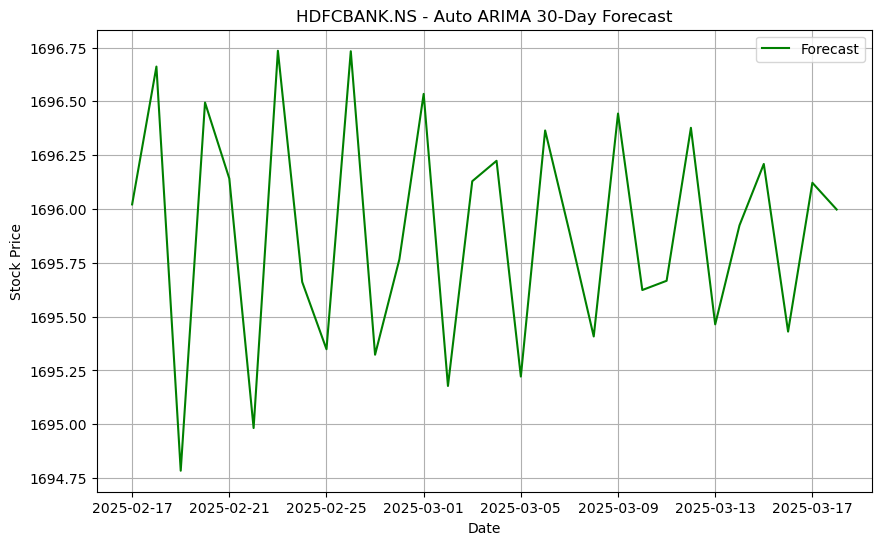


📊 AXISBANK.NS 30-Day Forecast:

741    998.120155
742    996.567790
743    997.241054
744    997.083875
745    997.087916
746    997.102505
747    997.095141
748    997.097111
749    997.096948
750    997.096819
751    997.096897
752    997.096873
753    997.096876
754    997.096877
755    997.096877
756    997.096877
757    997.096877
758    997.096877
759    997.096877
760    997.096877
761    997.096877
762    997.096877
763    997.096877
764    997.096877
765    997.096877
766    997.096877
767    997.096877
768    997.096877
769    997.096877
770    997.096877
Name: predicted_mean, dtype: float64


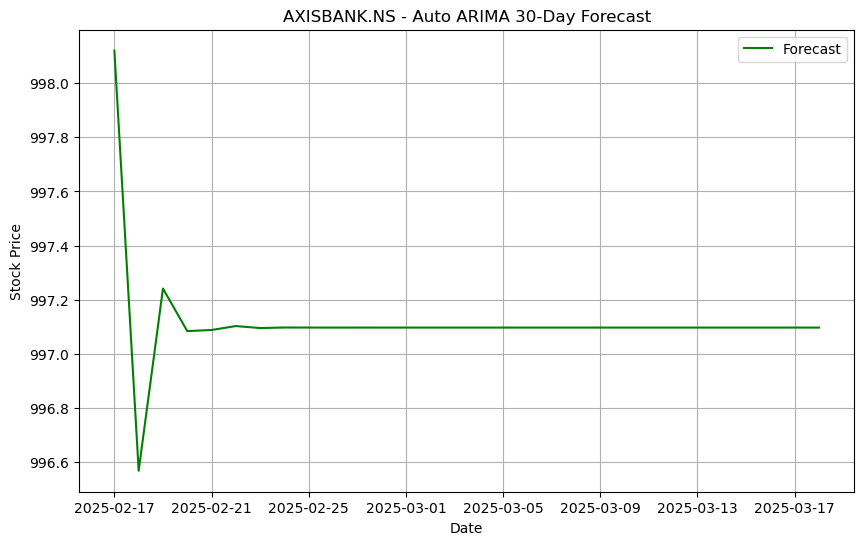


📊 ICICIBANK.NS 30-Day Forecast:

741    1259.494417
742    1259.880833
743    1259.464841
744    1259.712587
745    1259.424969
746    1259.581623
747    1259.381233
748    1259.478353
749    1259.337480
750    1259.395952
751    1259.295895
752    1259.329505
753    1259.257611
754    1259.275427
755    1259.223107
756    1259.231066
757    1259.192467
758    1259.194432
759    1259.165547
760    1259.164009
761    1259.142080
762    1259.138629
763    1259.121742
764    1259.117377
765    1259.104193
766    1259.099526
767    1259.089103
768    1259.084496
769    1259.076159
770    1259.071815
Name: predicted_mean, dtype: float64


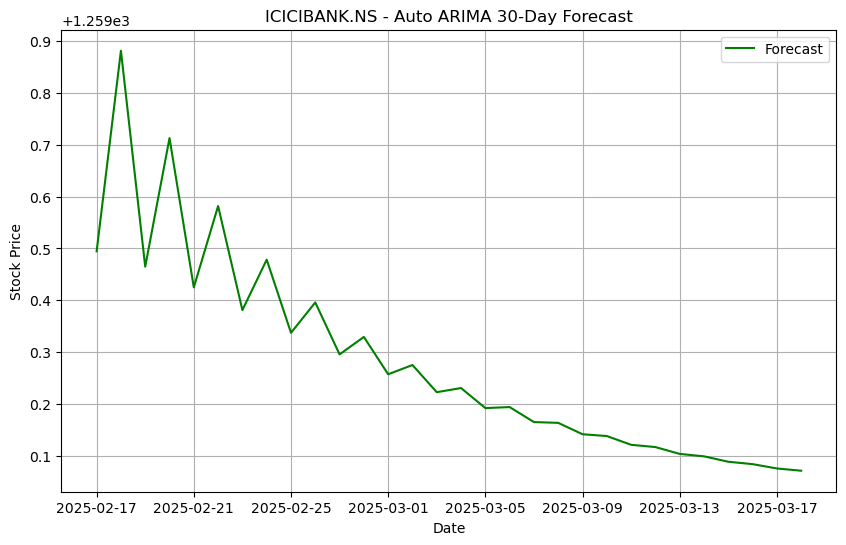

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Forecasts is a Dictionary Containing Forecasted Values for Each Ticker
for ticker in forecasts:
    # Print Forecasted Values
    print(f"\n📊 {ticker} 30-Day Forecast:\n")
    print(forecasts[ticker]['forecast_mean'])

    # Get Forecasted Values
    forecast_values = forecasts[ticker]['forecast_mean']
    
    # If You don't have the Last Date, You can Generate Future Dates Starting from Today
    last_date = pd.to_datetime('2025-02-16')  # Example Date, Replace With Actual last Date of Stock Data
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

    # Plot the Forecast
    plt.figure(figsize=(10, 6))

    # Plotting the Forecasted Data
    plt.plot(future_dates, forecast_values, label='Forecast', color='green')

    plt.title(f'{ticker} - Auto ARIMA 30-Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


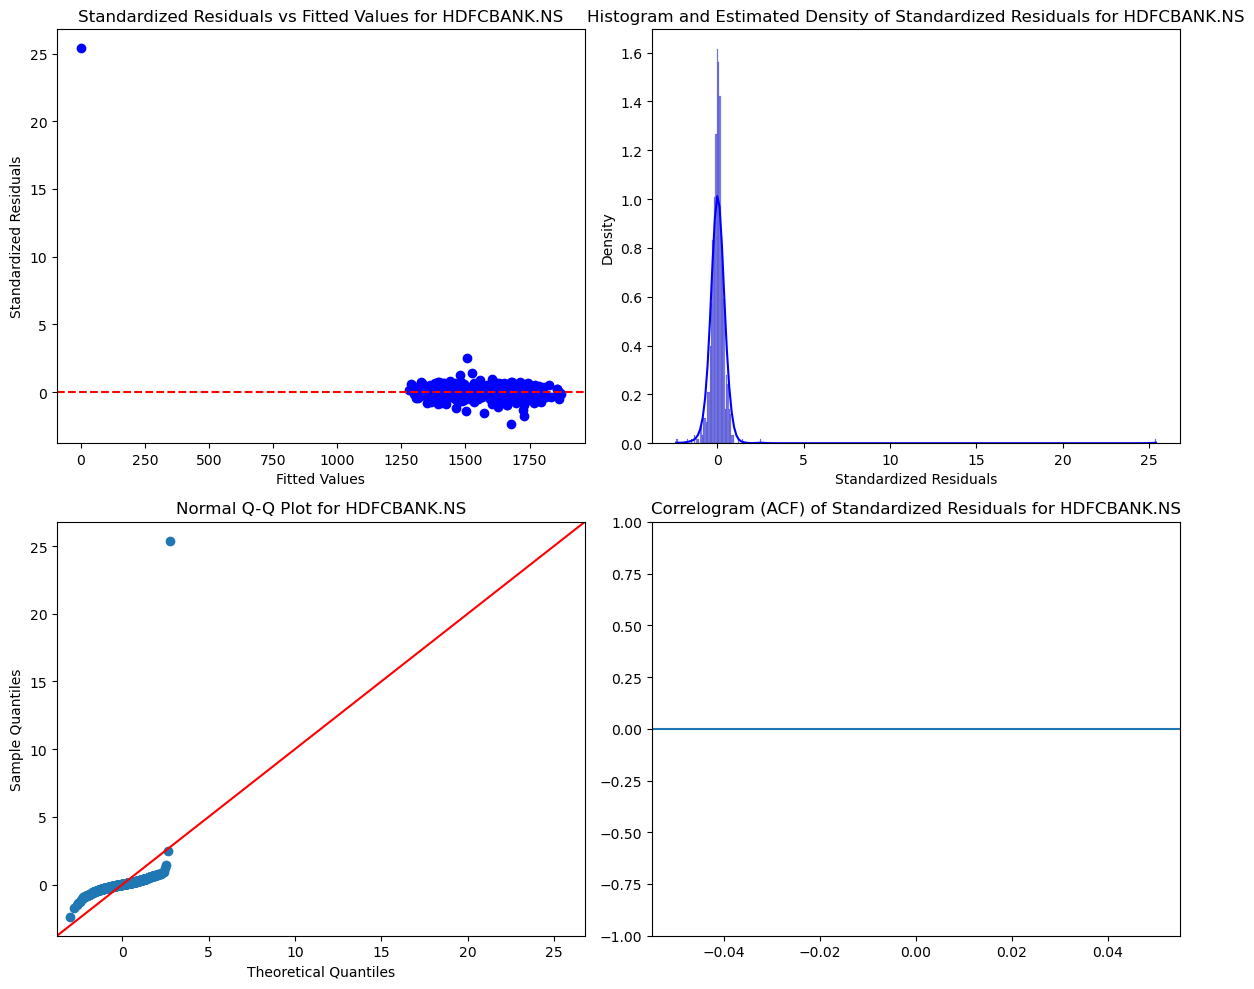

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


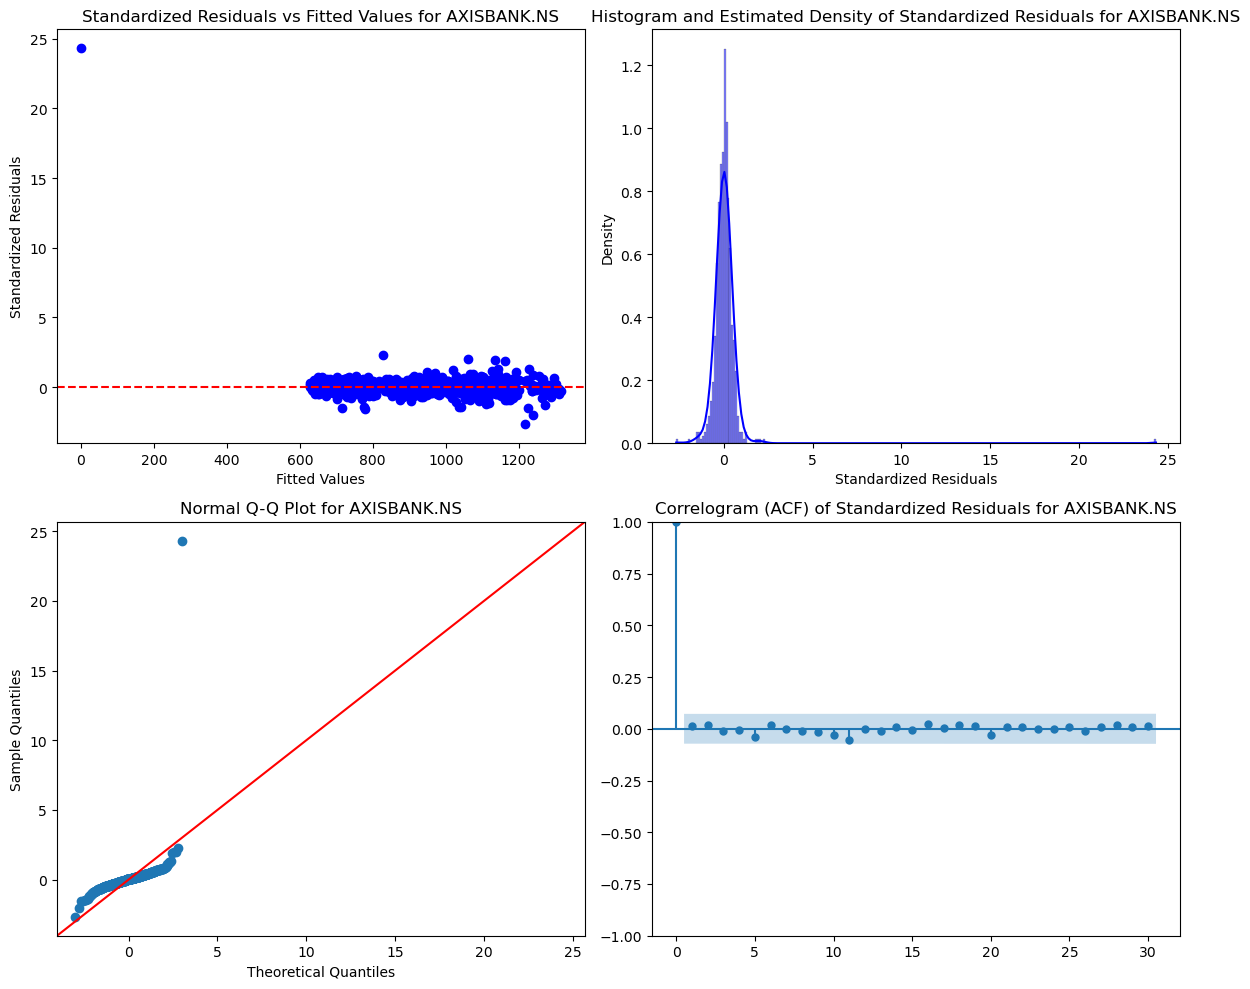

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

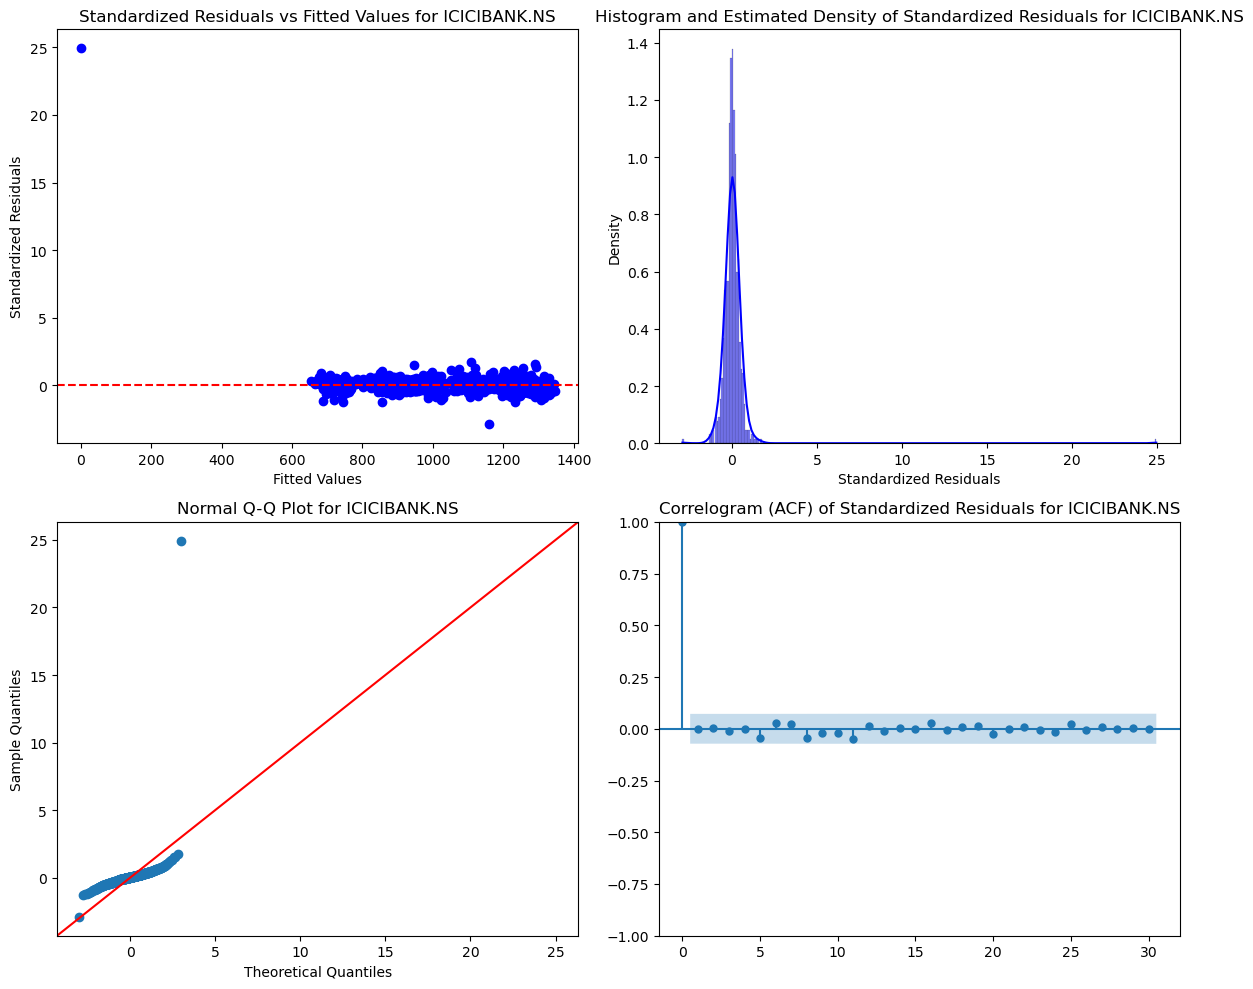

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'data' is your Time Series Data for Each Ticker
for ticker in forecasts:
    # Fit the ARIMA Model Again for Each Ticker
    model = ARIMA(data[ticker], order=(1, 1, 1))  # Adjust (p,d,q) as Necessary
    auto_model = model.fit()  # Fit the model
    
    # Extract Fitted Values and Residuals for the Training Set
    residuals = auto_model.resid
    
    # Standardize the Residuals
    standardized_residuals = residuals / residuals.std()
    
    # Plot Diagnostic Plots
    plt.figure(figsize=(12, 10))

    # 1. Standardized Residuals Plot (Vs. Fitted Values)
    plt.subplot(2, 2, 1)
    plt.scatter(auto_model.fittedvalues, standardized_residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Standardized Residuals vs Fitted Values for {ticker}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Standardized Residuals')

    # 2. Histogram with Estimated Density
    plt.subplot(2, 2, 2)
    sns.histplot(standardized_residuals, kde=True, color='blue', stat='density')
    plt.title(f'Histogram and Estimated Density of Standardized Residuals for {ticker}')
    plt.xlabel('Standardized Residuals')
    plt.ylabel('Density')

    # 3. Normal Q-Q Plot
    plt.subplot(2, 2, 3)
    sm.qqplot(standardized_residuals, line='45', ax=plt.gca())
    plt.title(f'Normal Q-Q Plot for {ticker}')
    
    # 4. Autocorrelation (ACF) Plot of Residuals
    plt.subplot(2, 2, 4)
    plot_acf(standardized_residuals, lags=30, ax=plt.gca())
    plt.title(f'Correlogram (ACF) of Standardized Residuals for {ticker}')
    
    plt.tight_layout()
    plt.show()

**Explanation of the Diagnostic Plots:**

***1. Standardized Residuals:*** This plot checks if the residuals are approximately normally distributed around zero.

***2. Histogram plus KDE of the Residuals:*** It tests the normality of the residuals.

***3. Normal Q-Q Plot:*** Checks if the residuals follow a normal distribution. Ideally, the points should lie on the line.

***4. Correlogram of Residuals (ACF plot):*** Tests whether residuals are uncorrelated. Significant autocorrelation indicates that the model can be improved.

#### Auto ARIMA with Seasonal Component

In [51]:
import pandas as pd

# Load the CSV file to Check its Structure
data = pd.read_csv('HDFC_AXIS_ICICI_Last_3_Years.csv', parse_dates=['Date'], index_col='Date')

# Print the Columns of the Dataset
print(data.columns)

Index(['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS'], dtype='object')


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7007.265, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6802.996, Time=0.27 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7008.917, Time=0.05 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6735.063, Time=0.48 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6671.129, Time=1.49 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.59 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.23 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6671.512, Time=0.97 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6673.123, Time=1.46 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6673.096, Time=3.50 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6671.146, Time=1.26 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6675.125, Time=1.91 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=6673.126, Time=4.58 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 21.926 seconds

Auto SARIMA Model Summary for HDFCBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3330.564
Date:                            Sun, 16 Feb 2025   AIC                           6671.129
Time:                                    22:26:55   BIC                           6694.080
Sample:                                         0   HQIC                          6679.985
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


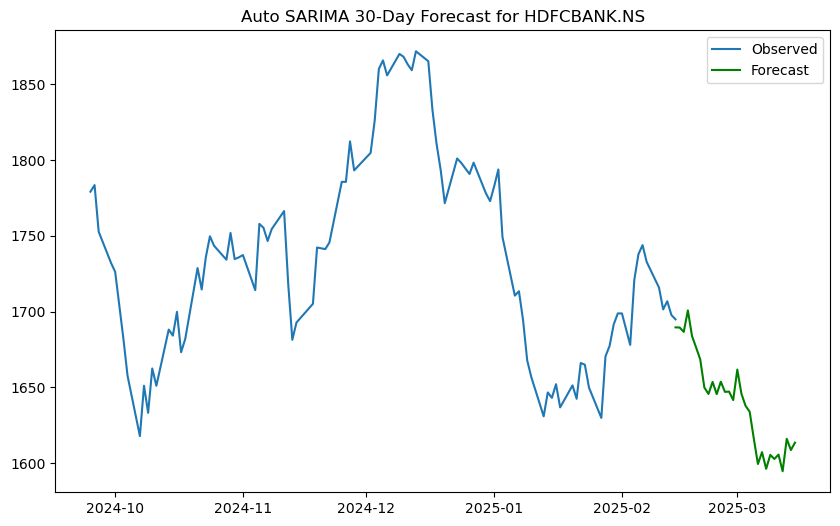

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6459.581, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6263.073, Time=0.27 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6461.338, Time=0.09 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6195.657, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6134.624, Time=1.03 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.88 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.05 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6137.524, Time=0.72 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6118.897, Time=1.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6180.808, Time=0.64 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=7.98 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.53 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=6119.343, Time=1.65 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6119.820, Time=2.18 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6127.001, Time=2.44 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=6121.279, Time=2.95 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12] intercept   : AIC=6120.897, Time=5.35 sec

Best model:  ARIMA(2,1,0)(3,1,0)[12]          
Total fit time: 39.317 seconds

Auto SARIMA Model Summary for AXISBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3053.449
Date:                            Sun, 16 Feb 2025   AIC                           6118.897
Time:                                    22:27:35   BIC                           6146.439
Sample:                                         0   HQIC                          6129.525
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


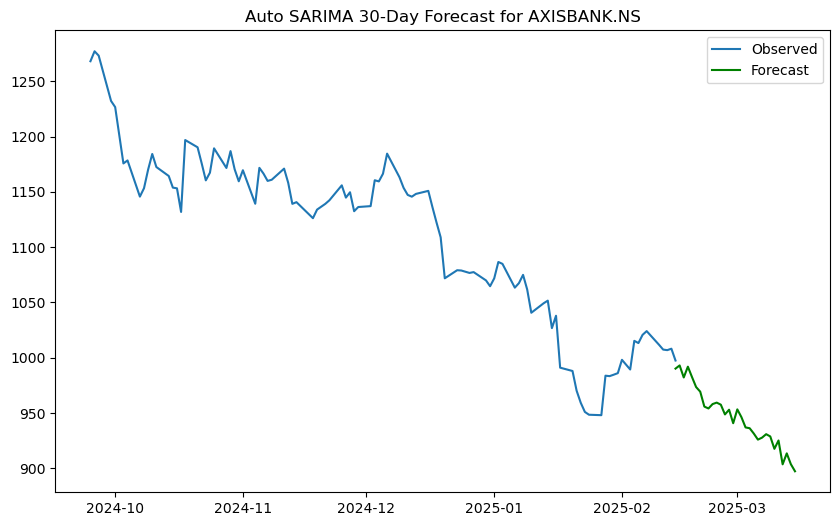

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6172.611, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6004.929, Time=0.20 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6173.999, Time=0.06 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5926.156, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5873.646, Time=1.01 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.04 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.03 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5872.676, Time=0.88 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5925.089, Time=0.35 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.17 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.12 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5873.654, Time=1.14 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5874.081, Time=2.10 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5874.675, Time=2.97 sec

Best model:  ARIMA(0,1,0)(3,1,0)[12]          
Total fit time: 22.214 seconds

Auto SARIMA Model Summary for ICICIBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -2932.338
Date:                            Sun, 16 Feb 2025   AIC                           5872.676
Time:                                    22:27:58   BIC                           5891.037
Sample:                                         0   HQIC                          5879.761
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


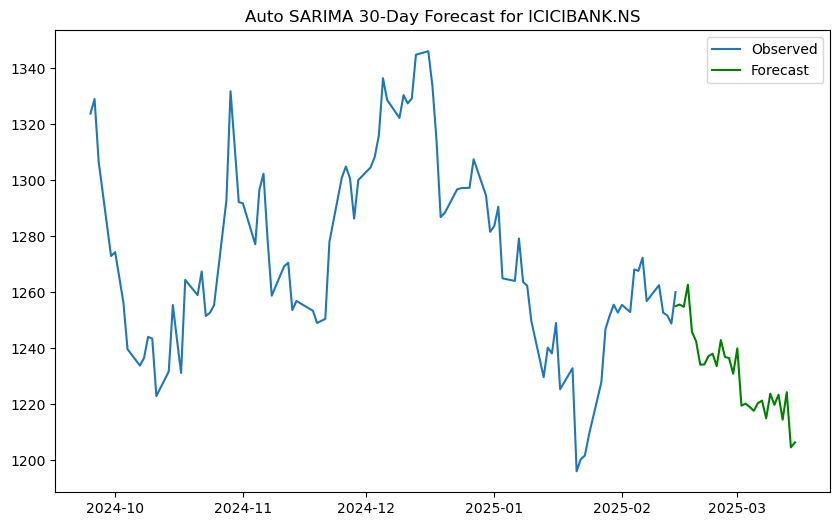

In [52]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Load the Dataset
data = pd.read_csv('HDFC_AXIS_ICICI_Last_3_Years.csv', parse_dates=['Date'], index_col='Date')

# Fill NaN Values with Forward Fill
data = data.fillna(method='ffill')

# Define the Tickers of Interest
bank_stocks = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']

for ticker in bank_stocks:
    # Extract Data for Each Ticker
    stock_data = data[ticker]

    # Apply auto_arima with Seasonal Component (SARIMA)
    auto_sarima = pm.auto_arima(stock_data, 
                                seasonal=True, 
                                m=12,  # Monthly Seasonality (Adjust this Depending on Your Data)
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=3, max_q=3,
                                start_P=0, start_Q=0,
                                max_P=3, max_Q=3,
                                d=1, D=1,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

    # Print the Summary of the Best Model
    print(f"\nAuto SARIMA Model Summary for {ticker}:")
    print(auto_sarima.summary())

    # Forecast the Next 30 Periods
    forecast_sarima = auto_sarima.predict(n_periods=30)

    # Plot the Observed and Forecast Values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index[-100:], stock_data[-100:], label='Observed')     # Last 100 Observations
    plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 30-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7007.265, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6802.996, Time=0.33 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7008.917, Time=0.04 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6735.063, Time=0.47 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6671.129, Time=1.23 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.40 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.26 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6671.512, Time=0.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6673.123, Time=1.52 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6673.096, Time=3.51 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6671.146, Time=1.16 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6675.125, Time=1.86 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=6673.126, Time=4.28 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 21.214 seconds

Auto SARIMA Model Summary for HDFCBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3330.564
Date:                            Sun, 16 Feb 2025   AIC                           6671.129
Time:                                    22:28:20   BIC                           6694.080
Sample:                                         0   HQIC                          6679.985
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


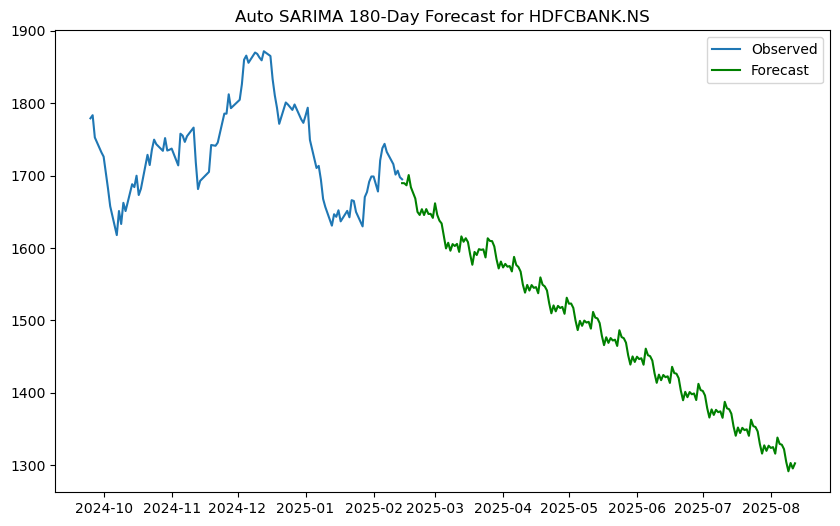

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6459.581, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6263.073, Time=0.20 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6461.338, Time=0.08 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6195.657, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6134.624, Time=1.05 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=7.46 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6137.524, Time=0.73 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6118.897, Time=1.20 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6180.808, Time=0.74 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=8.04 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.47 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=6119.343, Time=1.45 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6119.820, Time=2.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6127.001, Time=2.70 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=6121.279, Time=2.94 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12] intercept   : AIC=6120.897, Time=4.55 sec

Best model:  ARIMA(2,1,0)(3,1,0)[12]          
Total fit time: 39.369 seconds

Auto SARIMA Model Summary for AXISBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3053.449
Date:                            Sun, 16 Feb 2025   AIC                           6118.897
Time:                                    22:29:00   BIC                           6146.439
Sample:                                         0   HQIC                          6129.525
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


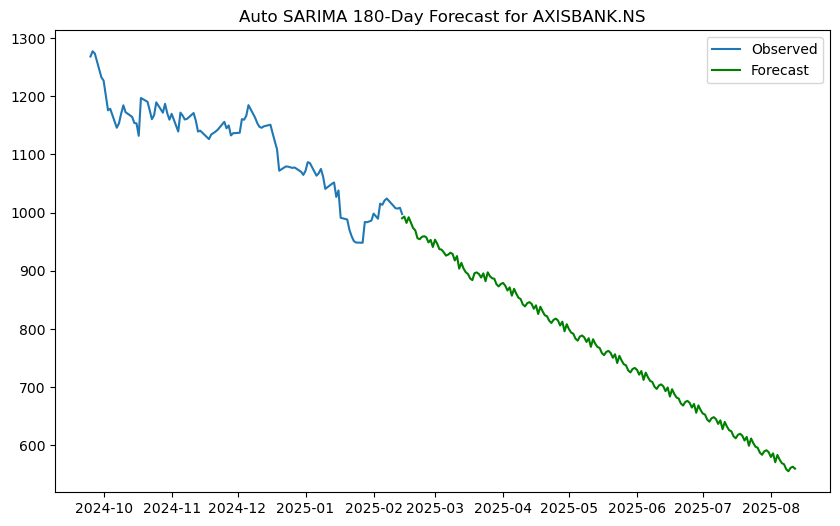

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6172.611, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6004.929, Time=0.18 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6173.999, Time=0.05 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5926.156, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5873.646, Time=0.97 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.56 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.96 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5872.676, Time=0.81 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5925.089, Time=0.36 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.12 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.10 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5873.654, Time=1.10 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5874.081, Time=2.12 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5874.675, Time=2.78 sec

Best model:  ARIMA(0,1,0)(3,1,0)[12]          
Total fit time: 21.206 seconds

Auto SARIMA Model Summary for ICICIBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -2932.338
Date:                            Sun, 16 Feb 2025   AIC                           5872.676
Time:                                    22:29:21   BIC                           5891.037
Sample:                                         0   HQIC                          5879.761
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


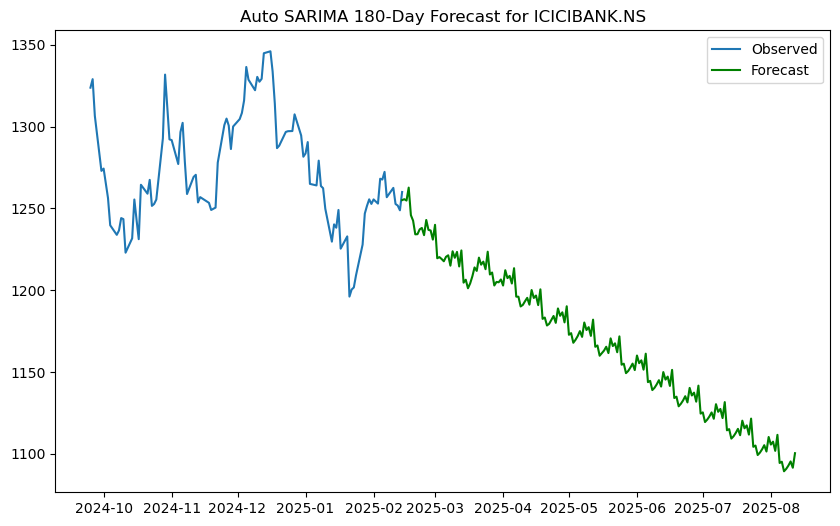

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# Load the Banking Stock Data
data = pd.read_csv('HDFC_AXIS_ICICI_Last_3_Years.csv', parse_dates=['Date'], index_col='Date')

# List of Banking Stocks
bank_stocks = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']

for ticker in bank_stocks:
    # Filter the Data for Each Ticker
    stock_data = data[ticker]
    
    # Handle Missing Values (You Can Choose to Fill or Drop)
    stock_data = stock_data.fillna(method='ffill')  # Forward Fill for Missing Values
    # Alternatively, You can Drop NaNs If Needed:
    # stock_data = stock_data.dropna()

    # Fit auto_arima Model (With Seasonal Component)
    auto_sarima = pm.auto_arima(stock_data,
                                seasonal=True,
                                m=12,  # Assuming Monthly Seasonality
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=3, max_q=3,
                                start_P=0, start_Q=0,
                                max_P=3, max_Q=3,
                                d=1, D=1,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

    # Print the Summary of the Best Model
    print(f"\nAuto SARIMA Model Summary for {ticker}:")
    print(auto_sarima.summary())

    # Forecast the Next 180 Periods (e.g., 180 days)
    forecast_sarima = auto_sarima.predict(n_periods=180)

    # Plot the Observed and Forecast Values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index[-100:], stock_data[-100:], label='Observed')  # Last 100 Observations
    plt.plot(pd.date_range(stock_data.index[-1], periods=180, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 180-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


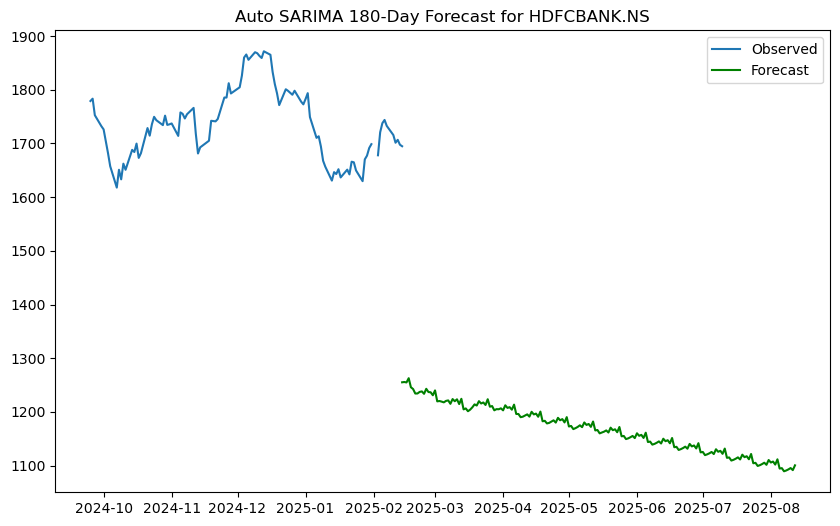

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


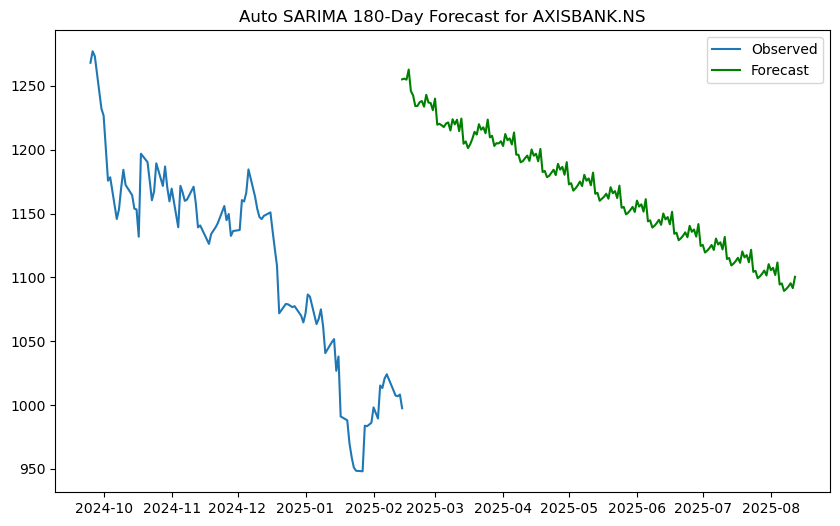

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


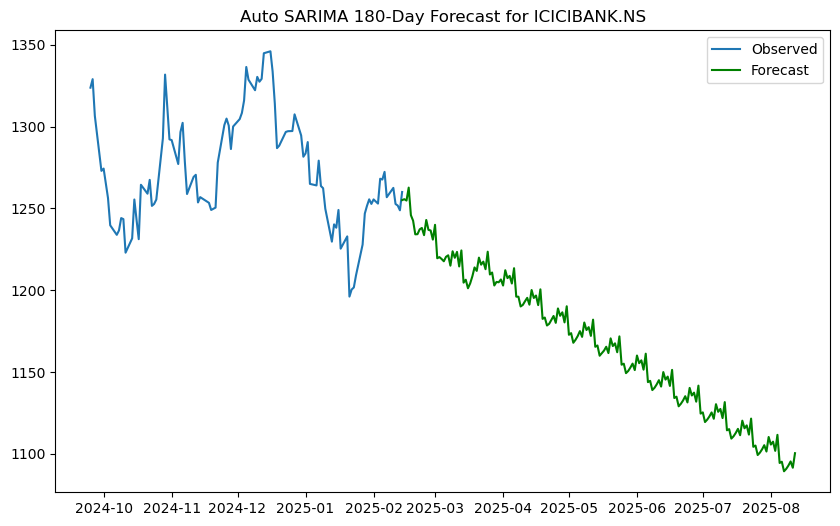

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Loop through Each Ticker and Plot the Observed and Forecast Values
for ticker in bank_stocks:
    # Filter the Data for Each Ticker
    stock_data = data[ticker]

    # Forecast the Next 180 Periods (After Fitting the SARIMA Model)
    forecast_sarima = auto_sarima.predict(n_periods=180)

    # Plot the Observed and Forecast Values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index[-100:], stock_data[-100:], label='Observed')  # Last 100 Observations
    plt.plot(pd.date_range(stock_data.index[-1], periods=180, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 180-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7007.265, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6802.996, Time=0.24 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7008.917, Time=0.03 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6735.063, Time=0.51 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6671.129, Time=1.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.30 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6671.512, Time=0.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6673.123, Time=1.42 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6673.096, Time=3.25 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6671.146, Time=1.10 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6675.125, Time=2.06 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=6673.126, Time=4.23 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 20.575 seconds
Auto SARIMA Model Summary for HDFCBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3330.564
Date:                            Sun, 16 Feb 2025   AIC                           6671.129
Time:                                    22:29:43   BIC                           6694.080
Sample:                                         0   HQIC                          6679.985
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


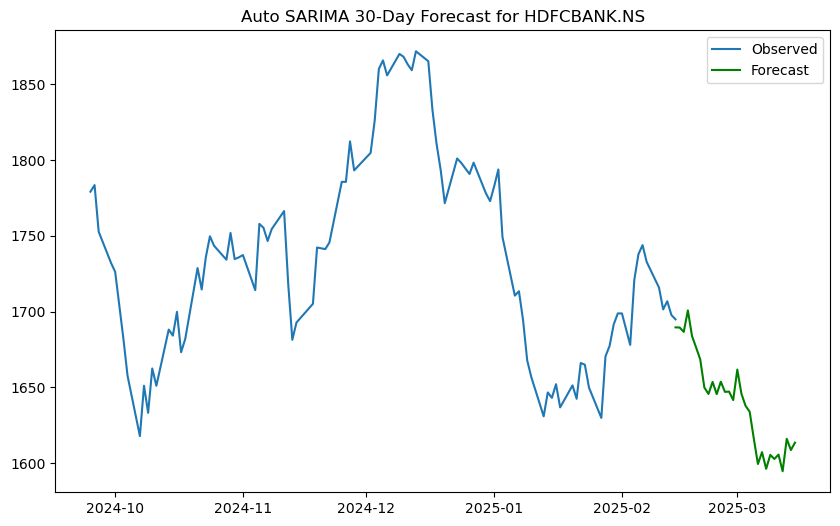

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6459.581, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6263.073, Time=0.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6461.338, Time=0.06 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6195.657, Time=0.40 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6134.624, Time=0.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=7.10 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.23 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6137.524, Time=0.78 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6118.897, Time=1.47 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6180.808, Time=0.63 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=8.39 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.82 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=6119.343, Time=1.76 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6119.820, Time=1.96 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6127.001, Time=1.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=6121.279, Time=2.99 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12] intercept   : AIC=6120.897, Time=5.28 sec

Best model:  ARIMA(2,1,0)(3,1,0)[12]          
Total fit time: 40.037 seconds
Auto SARIMA Model Summary for AXISBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3053.449
Date:                            Sun, 16 Feb 2025   AIC                           6118.897
Time:                                    22:30:24   BIC                           6146.439
Sample:                                         0   HQIC                          6129.525
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


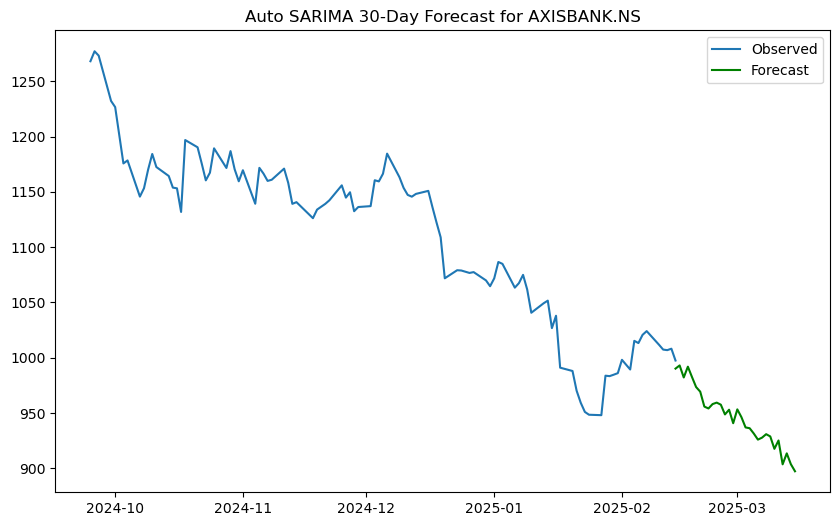

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6172.611, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6004.929, Time=0.17 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6173.999, Time=0.04 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5926.156, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5873.646, Time=0.98 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.71 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.88 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5872.676, Time=0.78 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5925.089, Time=0.39 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.38 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.11 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5873.654, Time=1.12 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5874.081, Time=2.13 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5874.675, Time=2.84 sec

Best model:  ARIMA(0,1,0)(3,1,0)[12]          
Total fit time: 21.630 seconds
Auto SARIMA Model Summary for ICICIBANK.NS:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -2932.338
Date:                            Sun, 16 Feb 2025   AIC                           5872.676
Time:                                    22:30:46   BIC                           5891.037
Sample:                                         0   HQIC                          5879.761
                                            - 741                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


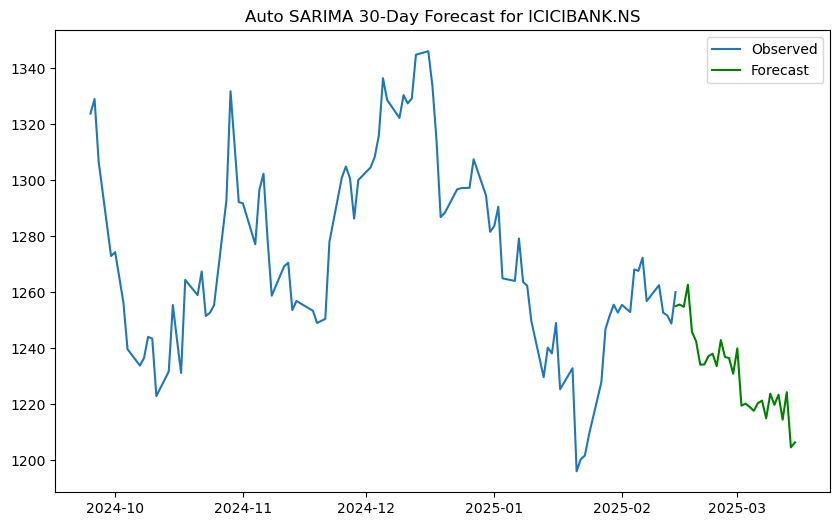

In [55]:
# List of Bank Stock Tickers
bank_stocks = ['HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS']

for ticker in bank_stocks:
    # Load the Stock Data for the Ticker (Ensure 'Date' is in DateTime Format and Set as Index)
    stock_data = data[ticker]

    # Handle Missing Values (Option 1: Forward Fill)
    stock_data = stock_data.fillna(method='ffill')  # Forward Fill the Missing Values

    # Optionally, If You Want to Fill with the Mean of the Column:
    # stock_data = stock_data.fillna(stock_data.mean())

    # Optionally, If You Want to Drop Rows with Missing Values:
    # stock_data = stock_data.dropna()

    # Fit the auto_arima Model with Seasonal Component (SARIMA)
    auto_sarima = pm.auto_arima(stock_data,
                                seasonal=True,
                                m=12,  # Monthly Seasonality (Adjust Based on Your Data)
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=3, max_q=3,
                                start_P=0, start_Q=0,
                                max_P=3, max_Q=3,
                                d=1, D=1,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

    # Print the Summary of the Best Model
    print(f"Auto SARIMA Model Summary for {ticker}:")
    print(auto_sarima.summary())

    # Forecast the Next 30 Periods (Adjust as Needed)
    forecast_sarima = auto_sarima.predict(n_periods=30)

    # Plot the Observed and Forecast Values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index[-100:], stock_data[-100:], label='Observed')  # Last 100 observations
    plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 30-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


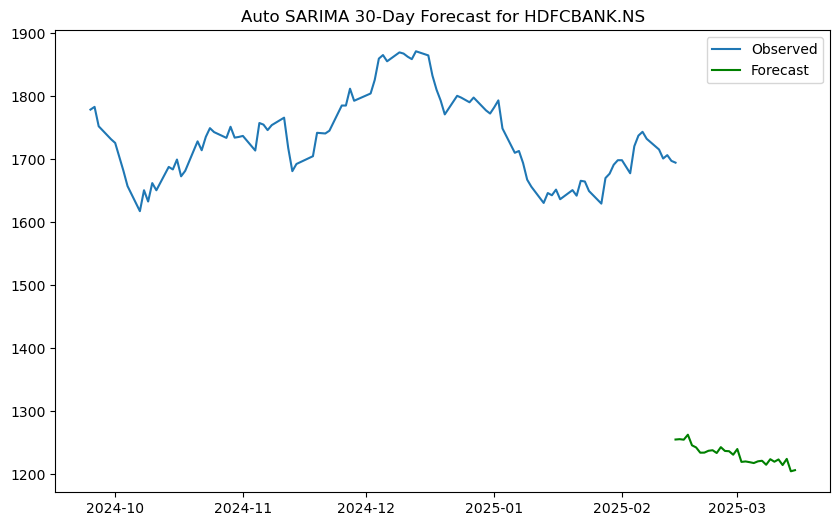

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


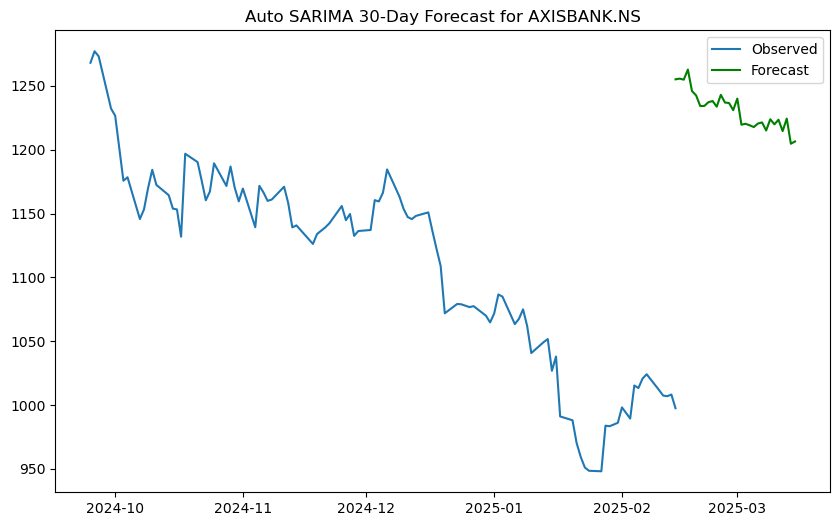

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


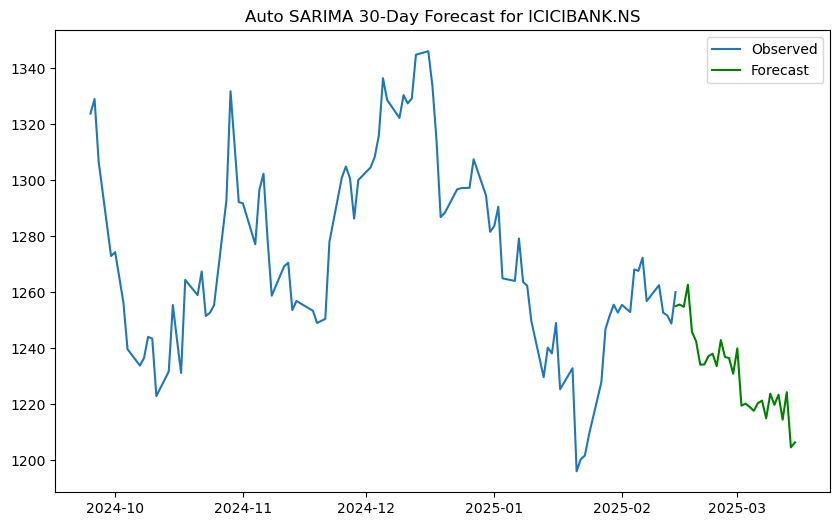

In [56]:
# Plot the Observed and Forecast Values for Each Bank Stock
for ticker in bank_stocks:
    stock_data = data[ticker]

    # Handle Missing Values (Forward Fill for Missing Data)
    stock_data = stock_data.fillna(method='ffill')

    # Forecast using SARIMA Model
    forecast_sarima = auto_sarima.predict(n_periods=30)

    # Plot the Observed and Forecasted Values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index[-100:], stock_data[-100:], label='Observed')  # Last 100 Observations
    plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 30-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7007.265, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6802.996, Time=0.21 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7008.917, Time=0.04 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6735.063, Time=0.44 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6671.129, Time=1.27 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.32 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.51 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6671.512, Time=1.24 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6673.123, Time=1.50 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6673.096, Time=3.23 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6671.146, Time=1.24 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6675.125, Time=1.94 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=6673.126, Time=5.32 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 22.297 seconds


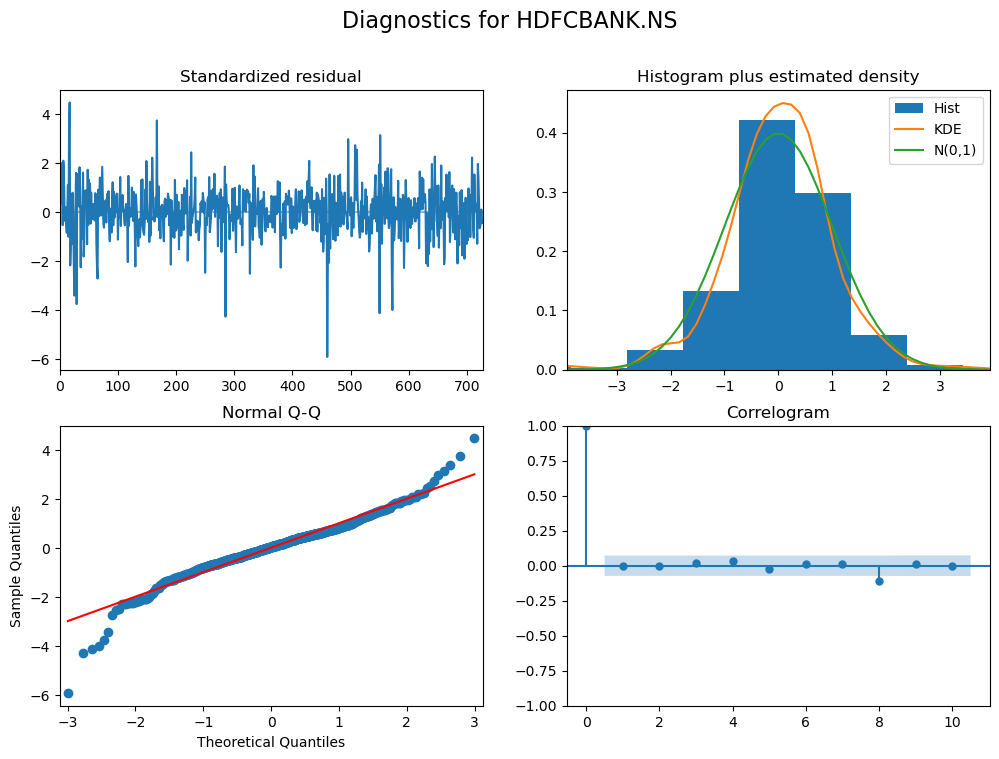

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6459.581, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6263.073, Time=0.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6461.338, Time=0.06 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6195.657, Time=0.40 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6134.624, Time=1.02 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=7.00 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.09 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=6137.524, Time=0.74 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=6118.897, Time=1.24 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6180.808, Time=0.58 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=7.96 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.53 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=6119.343, Time=1.50 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=6119.820, Time=2.17 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=6127.001, Time=2.60 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=6121.279, Time=3.34 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12] intercept   : AIC=6120.897, Time=5.49 sec

Best model:  ARIMA(2,1,0)(3,1,0)[12]          
Total fit time: 39.896 seconds


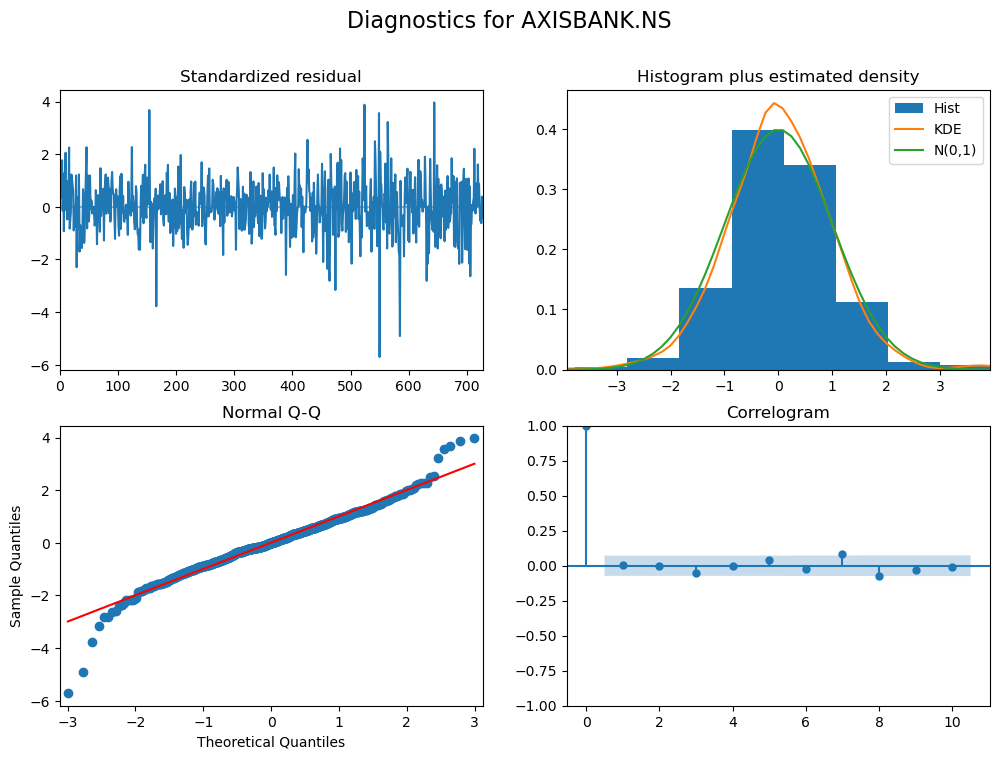

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6172.611, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6004.929, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6173.999, Time=0.05 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5926.156, Time=0.49 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5873.646, Time=1.09 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.65 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.98 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5872.676, Time=0.83 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5925.089, Time=0.32 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.12 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.09 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5873.654, Time=1.11 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5874.081, Time=2.30 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5874.675, Time=3.53 sec

Best model:  ARIMA(0,1,0)(3,1,0)[12]          
Total fit time: 22.405 seconds


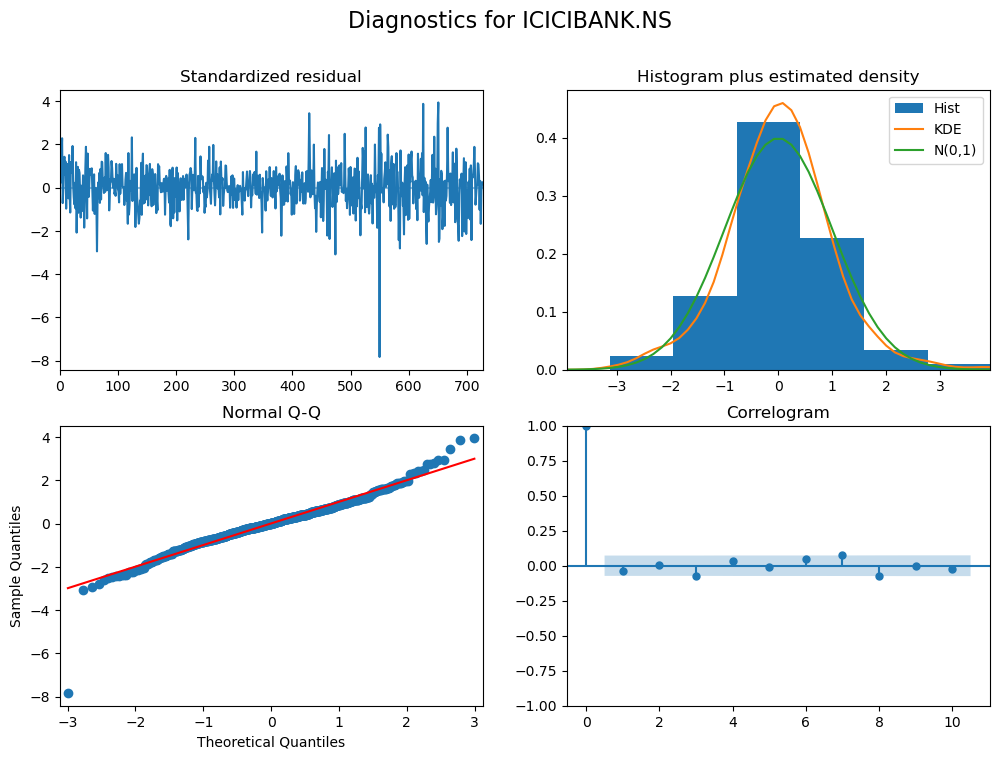

In [57]:
# Plot Diagnostics of the Fitted SARIMA Model for Each Bank Stock
for ticker in bank_stocks:
    stock_data = data[ticker]

    # Handle Missing Values (Forward Fill for Missing Data)
    stock_data = stock_data.fillna(method='ffill')

    # Fit the auto_arima Model with Seasonal Component (SARIMA)
    auto_sarima = pm.auto_arima(stock_data,
                                 seasonal=True,
                                 m=12,  # Monthly Seasonality
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=3, max_q=3,
                                 start_P=0, start_Q=0,
                                 max_P=3, max_Q=3,
                                 d=1, D=1,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

    # Plot the Diagnostics of the Fitted SARIMA Model
    auto_sarima.plot_diagnostics(figsize=(12, 8))
    plt.suptitle(f'Diagnostics for {ticker}', fontsize=16)
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=7079.169, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=6924.282, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=7079.332, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=6811.589, Time=0.14 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=6763.446, Time=0.30 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=1.45 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=6762.083, Time=0.20 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[4]             : AIC=6810.410, Time=0.14 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=1.16 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(3,1,0)[4]             : AIC=6763.442, Time=0.21 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=6765.447, Time=0.33 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=6764.063, Time=0.59 sec

Best model:  ARIMA(0,1,0)(3,1,0)[4]          
Total fit time: 6.153 seconds
Auto SARIMA Model Summary for HDFCBANK.NS:
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  741
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -3377.042
Date:                           Sun, 16 Feb 2025   AIC                           6762.083
Time:                                   22:32:21   BIC                           6780.488
Sample:                                        0   HQIC                          6769.181
                                           - 741                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


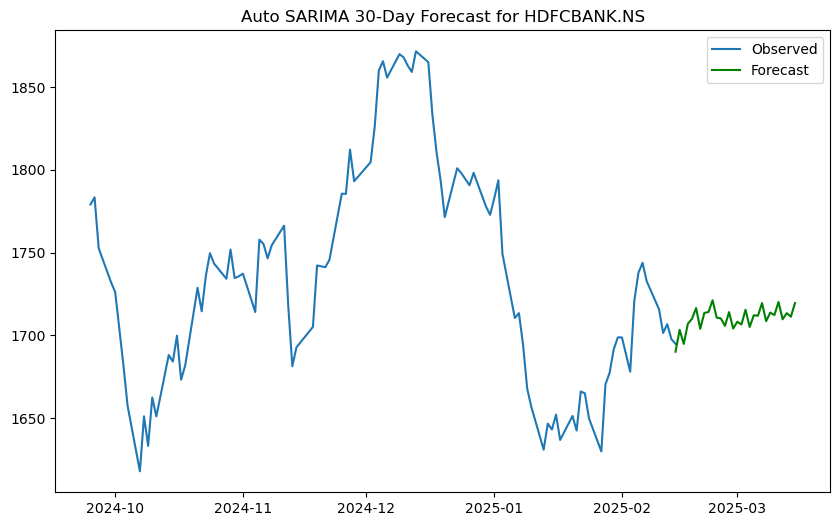

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=6247.351, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=6085.438, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=6249.302, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=5971.956, Time=0.13 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=5916.104, Time=0.21 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=1.00 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=5914.149, Time=0.19 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[4]             : AIC=5970.072, Time=0.14 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=0.78 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.45 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[4]             : AIC=5916.104, Time=0.22 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=5918.104, Time=0.30 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=5916.121, Time=0.61 sec

Best model:  ARIMA(0,1,0)(3,1,0)[4]          
Total fit time: 4.945 seconds
Auto SARIMA Model Summary for ICICIBANK.NS:
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  741
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -2953.074
Date:                           Sun, 16 Feb 2025   AIC                           5914.149
Time:                                   22:32:26   BIC                           5932.554
Sample:                                        0   HQIC                          5921.247
                                           - 741                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


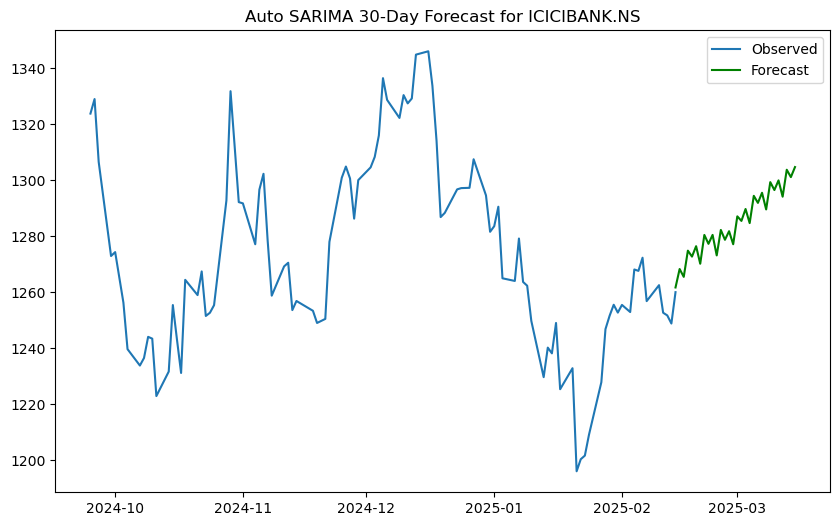

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=6543.004, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=6366.125, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=6542.620, Time=0.06 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=6260.177, Time=0.20 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=6205.033, Time=0.20 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=1.46 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=6205.824, Time=0.19 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4]             : AIC=6189.164, Time=0.29 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[4]             : AIC=6247.328, Time=0.29 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Time=1.76 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=1.03 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4]             : AIC=6191.164, Time=0.35 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[4]             : AIC=6191.164, Time=0.49 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=6200.619, Time=0.41 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[4]             : AIC=inf, Time=2.08 sec


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4] intercept   : AIC=6191.143, Time=0.91 sec

Best model:  ARIMA(2,1,0)(3,1,0)[4]          
Total fit time: 11.067 seconds
Auto SARIMA Model Summary for AXISBANK.NS:
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  741
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -3088.582
Date:                           Sun, 16 Feb 2025   AIC                           6189.164
Time:                                   22:32:38   BIC                           6216.771
Sample:                                        0   HQIC                          6199.811
                                           - 741                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


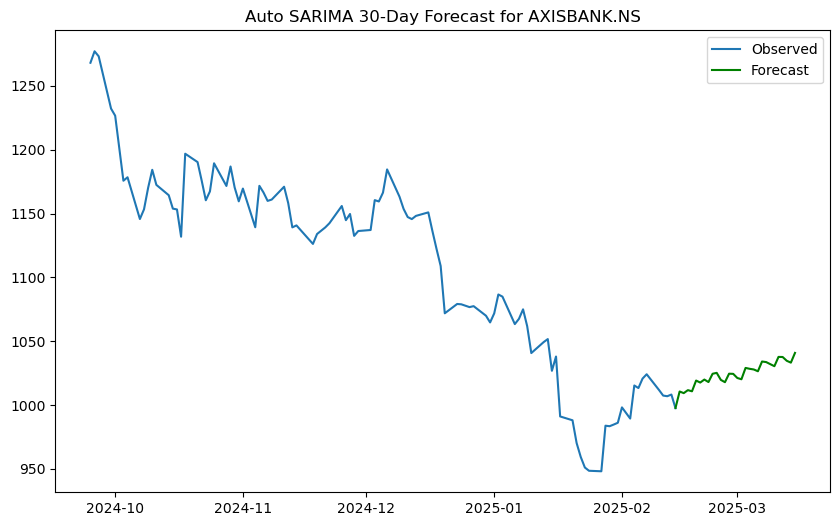

In [58]:
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

# List of Bank Tickers
bank_tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS']

# Loop over Each Bank Ticker
for ticker in bank_tickers:
    # Get the Bank Data
    bank_data = data[ticker]

    # Handle Missing Values (You Can Choose from Methods Like Forward Fill, Backward Fill, or Interpolation)
    bank_data = bank_data.fillna(method='ffill')  # Forward Fill

    # Fit the auto_arima Model with Seasonal Component (SARIMA)
    auto_sarima = pm.auto_arima(bank_data,
                                seasonal=True,
                                m=4,  # Assuming Quarterly Seasonality (Adjust if Necessary)
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=3, max_q=3,
                                start_P=0, start_Q=0,
                                max_P=3, max_Q=3,
                                d=1, D=1,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

    # Print the Summary of the Best Model
    print(f"Auto SARIMA Model Summary for {ticker}:")
    print(auto_sarima.summary())

    # Forecast the Next 30 Periods
    forecast_sarima = auto_sarima.predict(n_periods=30)

    # Plot the Observed and Forecast Values
    plt.figure(figsize=(10, 6))
    plt.plot(bank_data.index[-100:], bank_data[-100:], label='Observed')
    plt.plot(pd.date_range(bank_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
    plt.title(f'Auto SARIMA 30-Day Forecast for {ticker}')
    plt.legend()
    plt.show()

#### Additive Models

1. Used when seasonal variations are roughly constant. 

2. Useful when the seasonal variation is relatively constant over time. 

3. Tends to show a linear trend. 

**Multiplicative Models**

1. Used when seasonal variations change in proportion to the data. 

2. Useful when the seasonal variation increases over time. 

3. Tends to show an exponential trend. 

4. Good for forecasting sales data for growing businesses. 

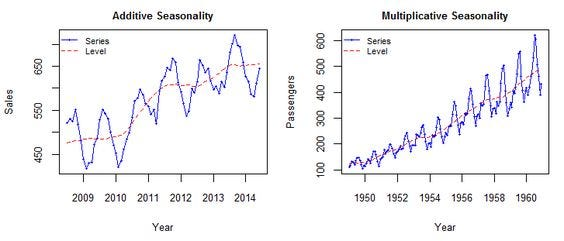

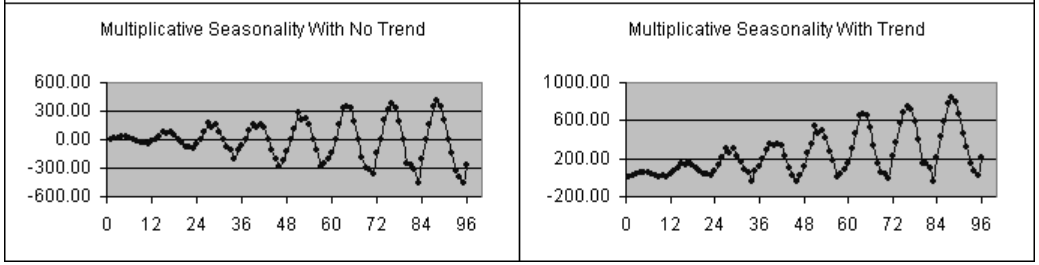

If your data shows a consistent linear trend, and there is no limit on the values that can be reached, go with 'linear'. If your data follows an S-shaped pattern and the values are bounded, choose logistic growth.

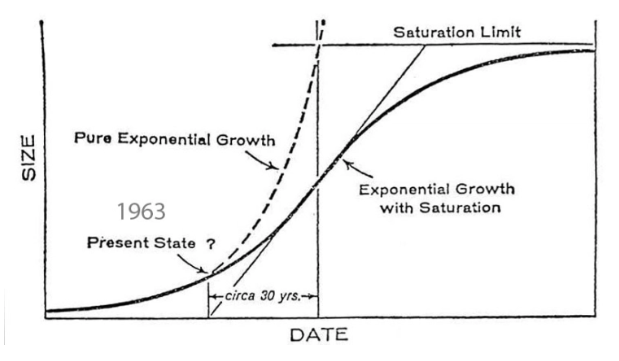

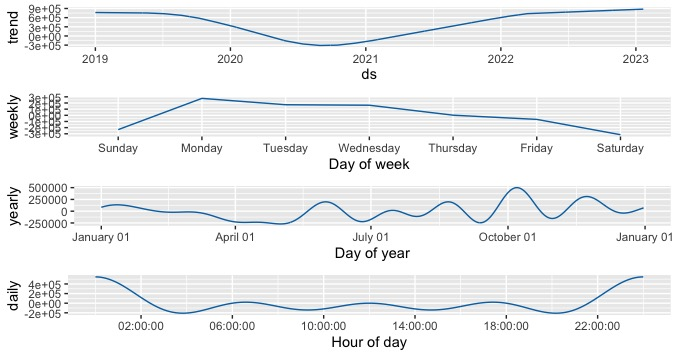

In [59]:
!pip install prophet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
for ticker in ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS']:
    print(f"Data for {ticker}:")
    print(data[ticker].head())  # Displaying the First Few Rows of the Bank Stock Data
    print("\n")

Data for HDFCBANK.NS:
Date
2022-02-17 00:00:00+00:00    1506.500000
2022-02-18 00:00:00+00:00    1512.349976
2022-02-21 00:00:00+00:00    1522.099976
2022-02-22 00:00:00+00:00    1510.699951
2022-02-23 00:00:00+00:00    1500.900024
Name: HDFCBANK.NS, dtype: float64


Data for ICICIBANK.NS:
Date
2022-02-17 00:00:00+00:00    750.349976
2022-02-18 00:00:00+00:00    748.900024
2022-02-21 00:00:00+00:00    754.450012
2022-02-22 00:00:00+00:00    751.299988
2022-02-23 00:00:00+00:00    744.599976
Name: ICICIBANK.NS, dtype: float64


Data for AXISBANK.NS:
Date
2022-02-17 00:00:00+00:00    782.799988
2022-02-18 00:00:00+00:00    787.400024
2022-02-21 00:00:00+00:00    788.849976
2022-02-22 00:00:00+00:00    779.150024
2022-02-23 00:00:00+00:00    777.200012
Name: AXISBANK.NS, dtype: float64




22:32:43 - cmdstanpy - INFO - Chain [1] start processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

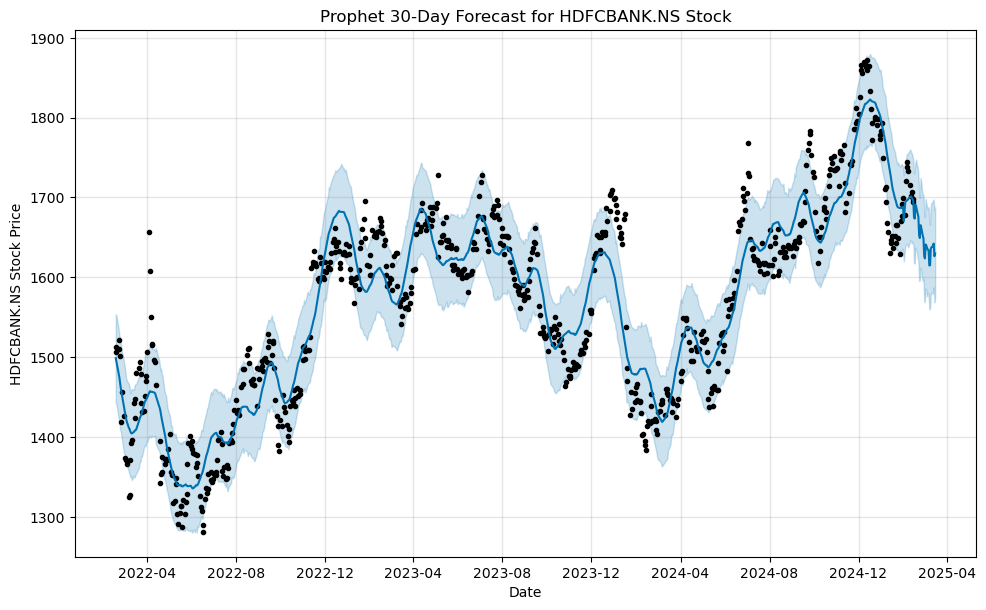

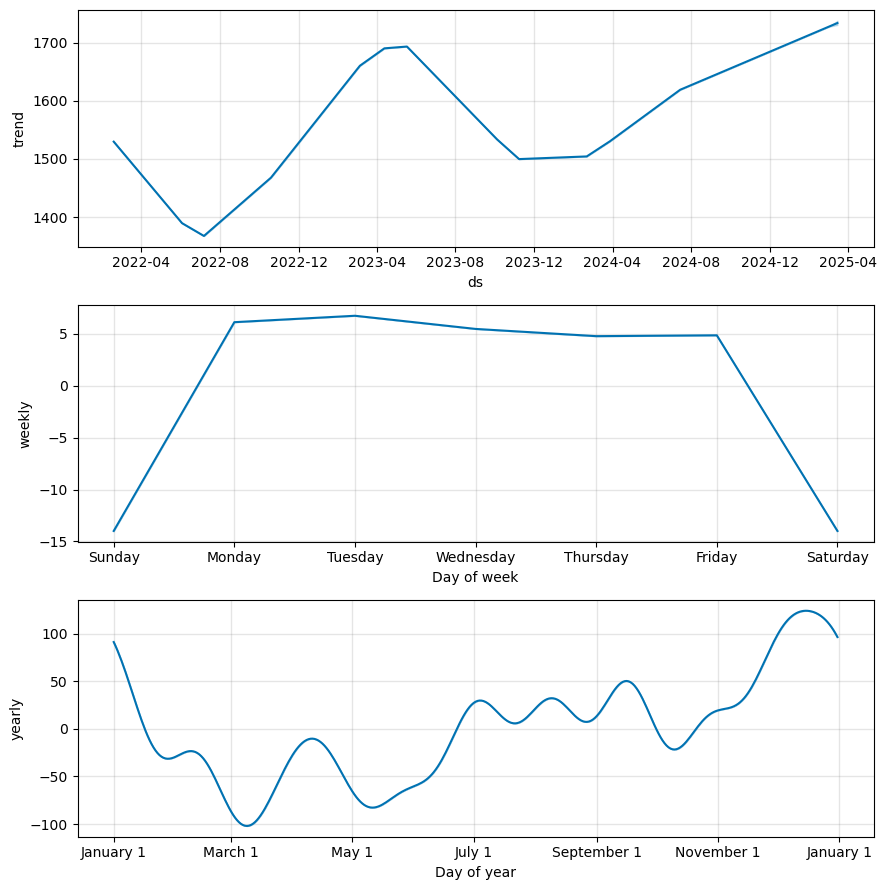

22:32:44 - cmdstanpy - INFO - Chain [1] start processing
22:32:44 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

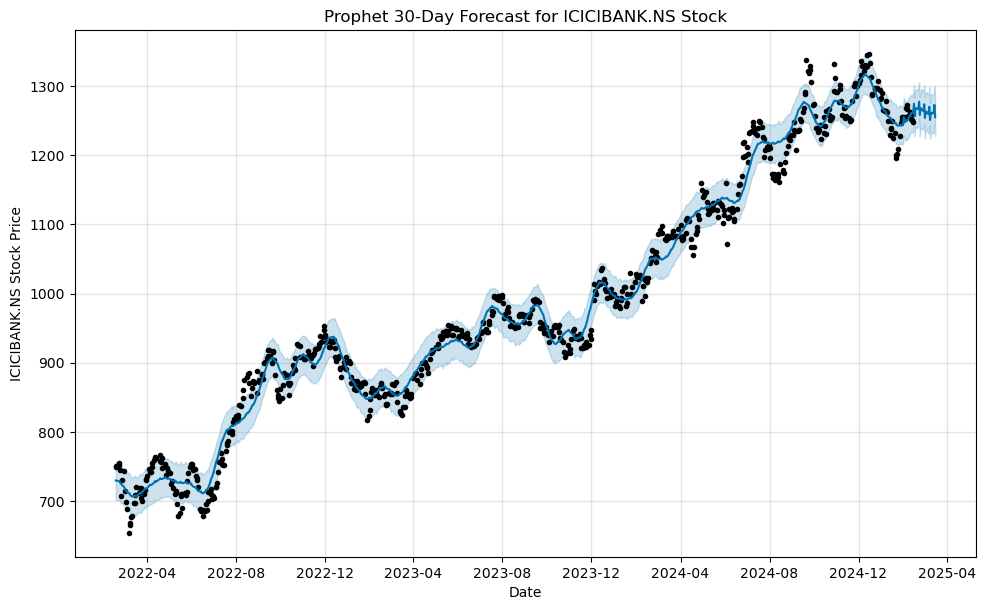

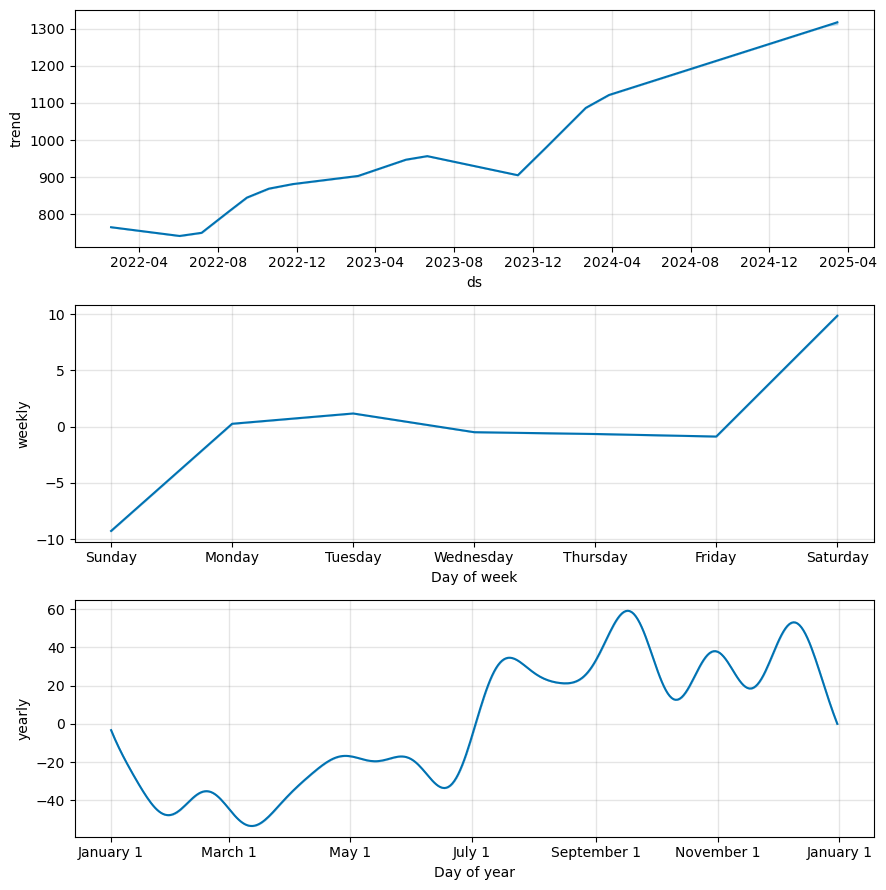

22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:46 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

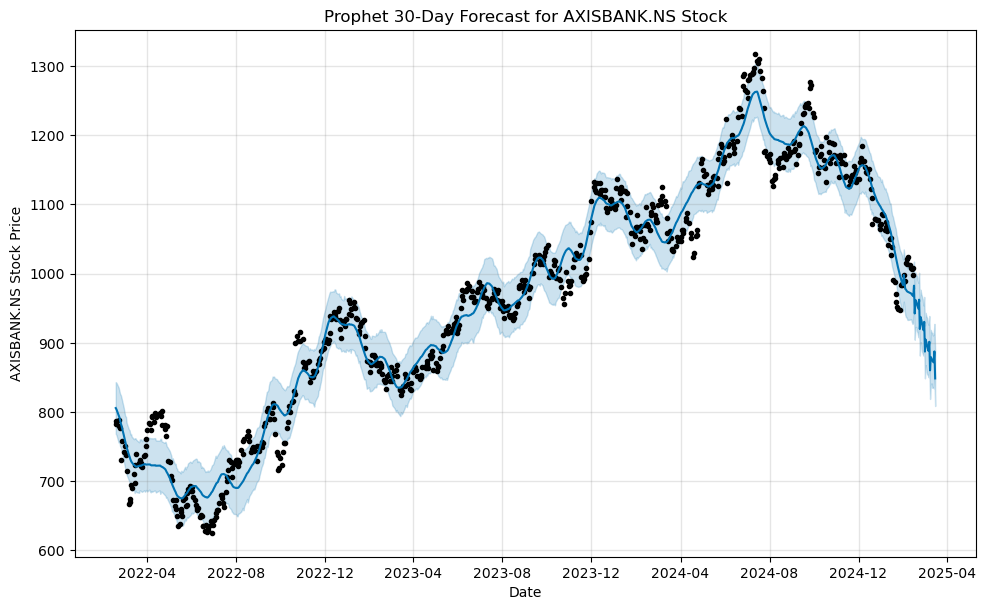

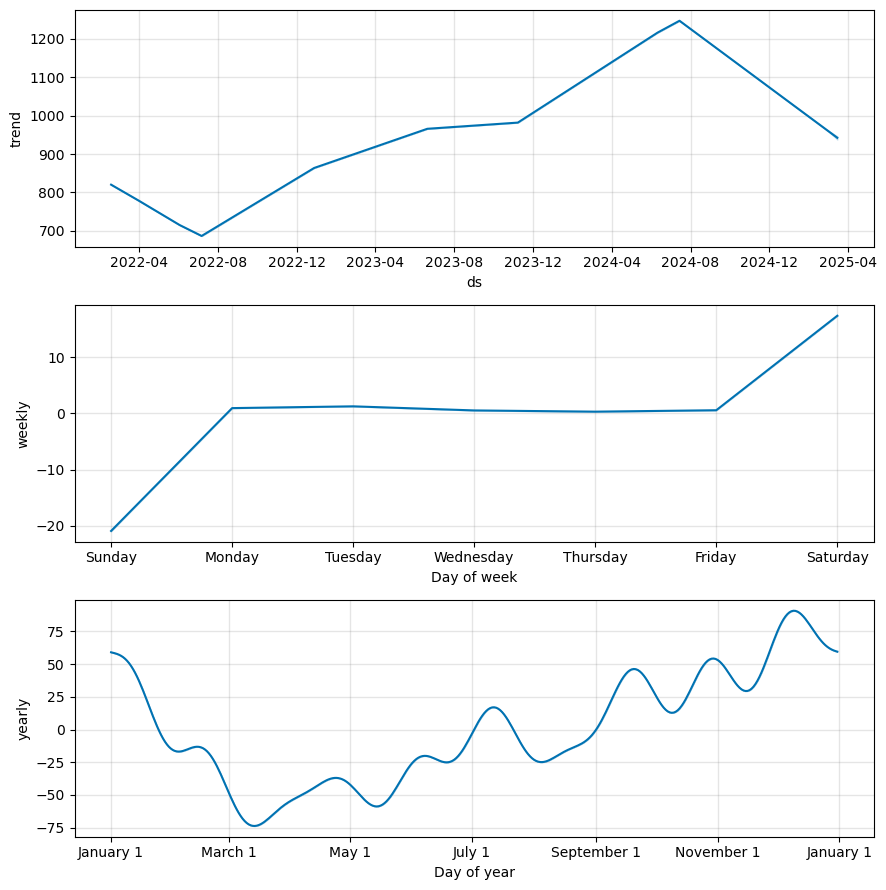

In [61]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# List of Bank Tickers for Your Data
bank_tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS']

# Loop through Each Bank Ticker and Fit a Model
for ticker in bank_tickers:
    # Prepare the Data for Prophet. Prophet expects a DataFrame with 'ds' (date) and 'y' (values)
    bank_data = data[ticker]  # Use the Corresponding Stock Data
    prophet_data = bank_data.reset_index()
    prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for Values

    # Ensure the 'ds' Column is in DateTime Format and Remove any Timezone Information
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

    # Initialize the Prophet Model
    model = Prophet()

    # Fit the Model on the Historical Data
    model.fit(prophet_data)

    # Forecast for the next 30 Days
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the Forecast
    plt.figure(figsize=(10, 6))
    fig = model.plot(forecast)
    plt.title(f'Prophet 30-Day Forecast for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel(f'{ticker} Stock Price')
    plt.show()

    # Optional: Plot Components (Trend, Seasonality, etc.)
    fig2 = model.plot_components(forecast)
    plt.show()

22:32:47 - cmdstanpy - INFO - Chain [1] start processing
22:32:49 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

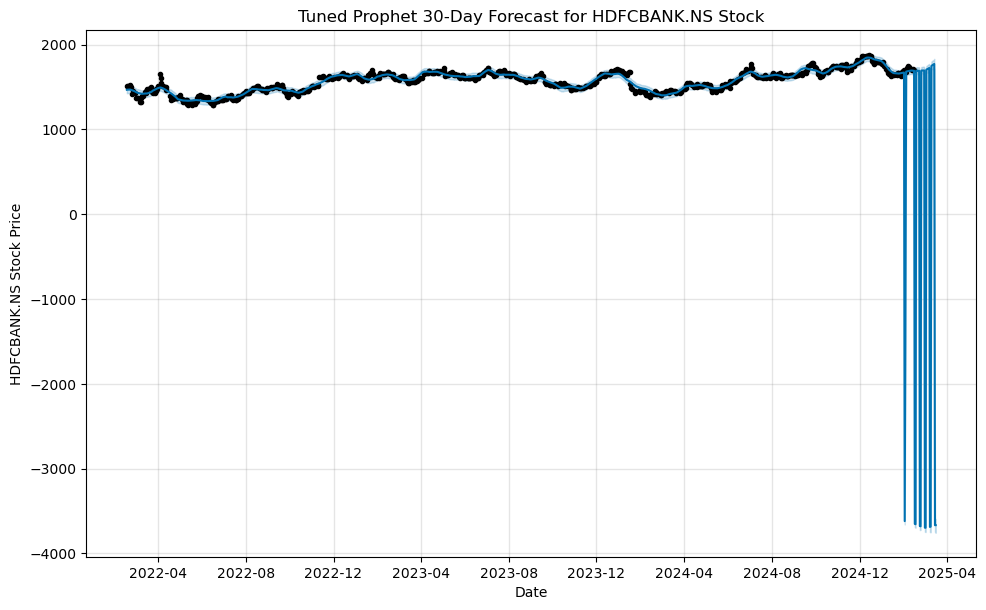

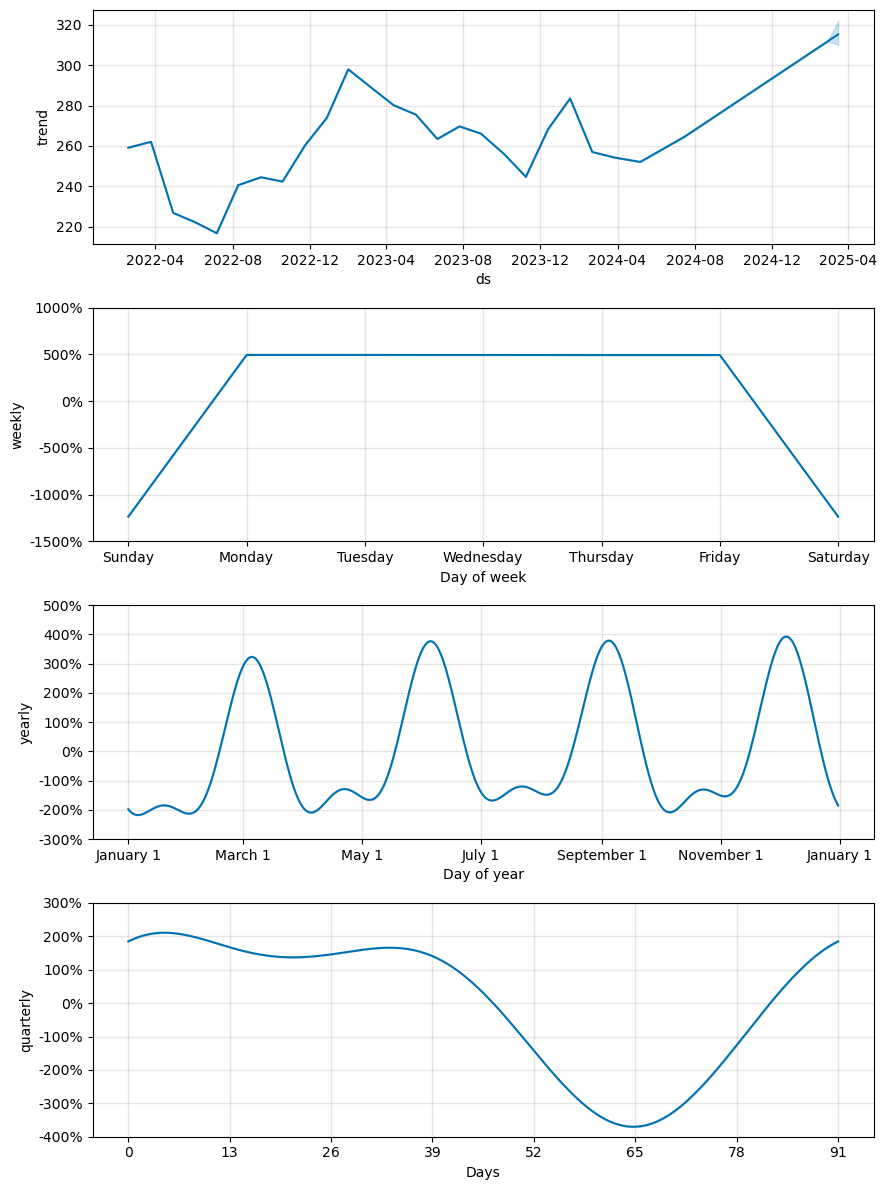

22:32:50 - cmdstanpy - INFO - Chain [1] start processing


            ds         yhat   yhat_lower   yhat_upper
741 2025-02-15 -3652.700285 -3690.842358 -3615.251314
742 2025-02-16 -3656.483986 -3698.343743 -3616.867294
743 2025-02-17  1692.327952  1652.304507  1733.789350
744 2025-02-18  1692.188403  1652.504546  1733.072227
745 2025-02-19  1691.290047  1649.802772  1732.743878
746 2025-02-20  1690.159939  1649.748761  1731.052027
747 2025-02-21  1690.474420  1648.355857  1731.996636
748 2025-02-22 -3677.842694 -3725.786990 -3637.005023
749 2025-02-23 -3681.291528 -3723.590742 -3639.994599
750 2025-02-24  1693.090412  1649.860038  1734.955544
751 2025-02-25  1693.295552  1654.329417  1735.752732
752 2025-02-26  1692.877749  1653.135554  1738.404836
753 2025-02-27  1692.504410  1651.869409  1739.158989
754 2025-02-28  1694.010941  1651.984521  1736.528382
755 2025-03-01 -3697.794711 -3745.454743 -3647.790188
756 2025-03-02 -3698.805172 -3749.241637 -3646.760992
757 2025-03-03  1704.004182  1661.860122  1746.246521
758 2025-03-04  1708.087059 

22:32:51 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

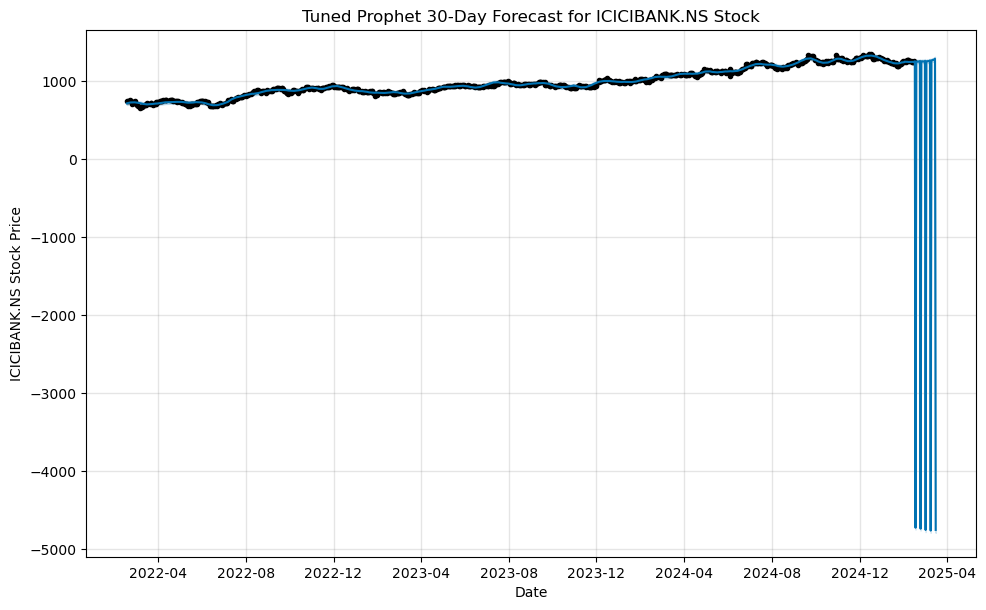

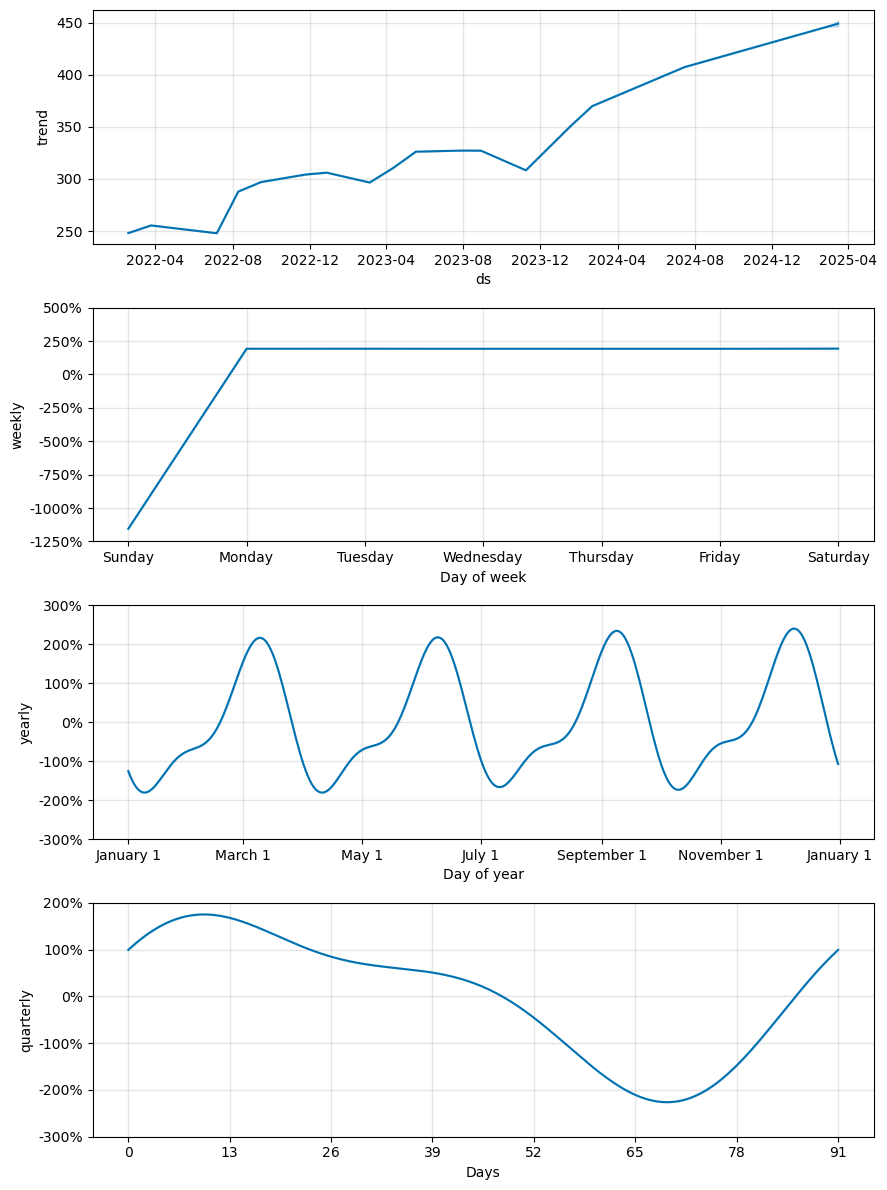

22:32:52 - cmdstanpy - INFO - Chain [1] start processing


            ds         yhat   yhat_lower   yhat_upper
741 2025-02-15  1256.932025  1234.762190  1279.126580
742 2025-02-16 -4730.732058 -4753.535293 -4708.934096
743 2025-02-17  1254.359214  1232.001202  1274.488958
744 2025-02-18  1255.778134  1234.013253  1277.324540
745 2025-02-19  1254.819810  1234.645049  1277.997792
746 2025-02-20  1254.616355  1232.279754  1276.351678
747 2025-02-21  1254.936825  1232.874361  1277.227793
748 2025-02-22  1261.008737  1239.310666  1281.884912
749 2025-02-23 -4743.513458 -4765.608134 -4721.322845
750 2025-02-24  1256.999184  1234.596772  1278.714772
751 2025-02-25  1257.639840  1236.448310  1279.234019
752 2025-02-26  1255.963394  1234.625235  1279.157219
753 2025-02-27  1255.186197  1232.231902  1277.730971
754 2025-02-28  1255.139318  1233.857577  1278.964343
755 2025-03-01  1261.110506  1238.207101  1286.423212
756 2025-03-02 -4759.444587 -4786.428952 -4733.656372
757 2025-03-03  1257.706414  1236.795562  1279.631666
758 2025-03-04  1259.091470 

22:32:53 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

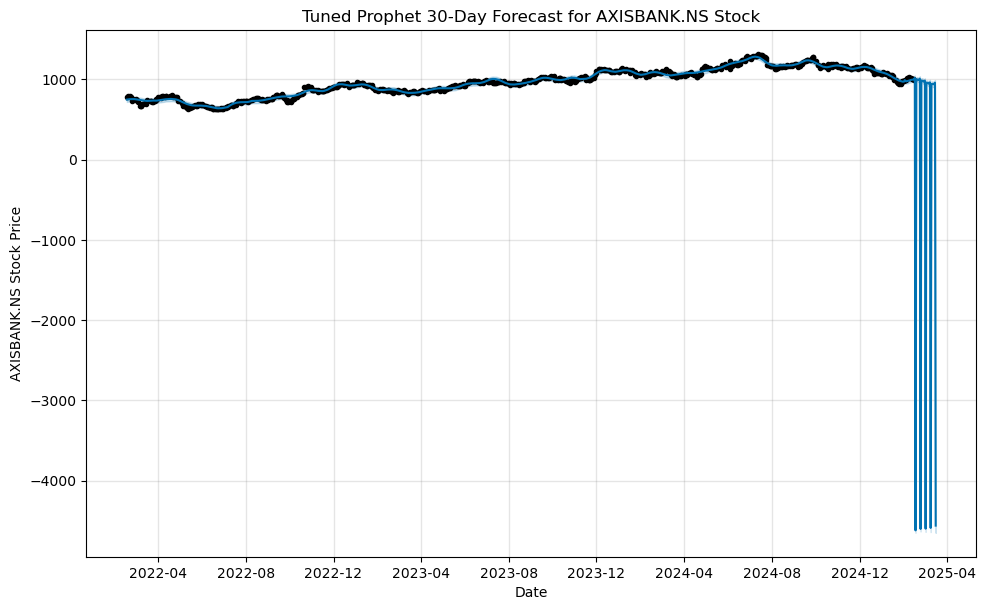

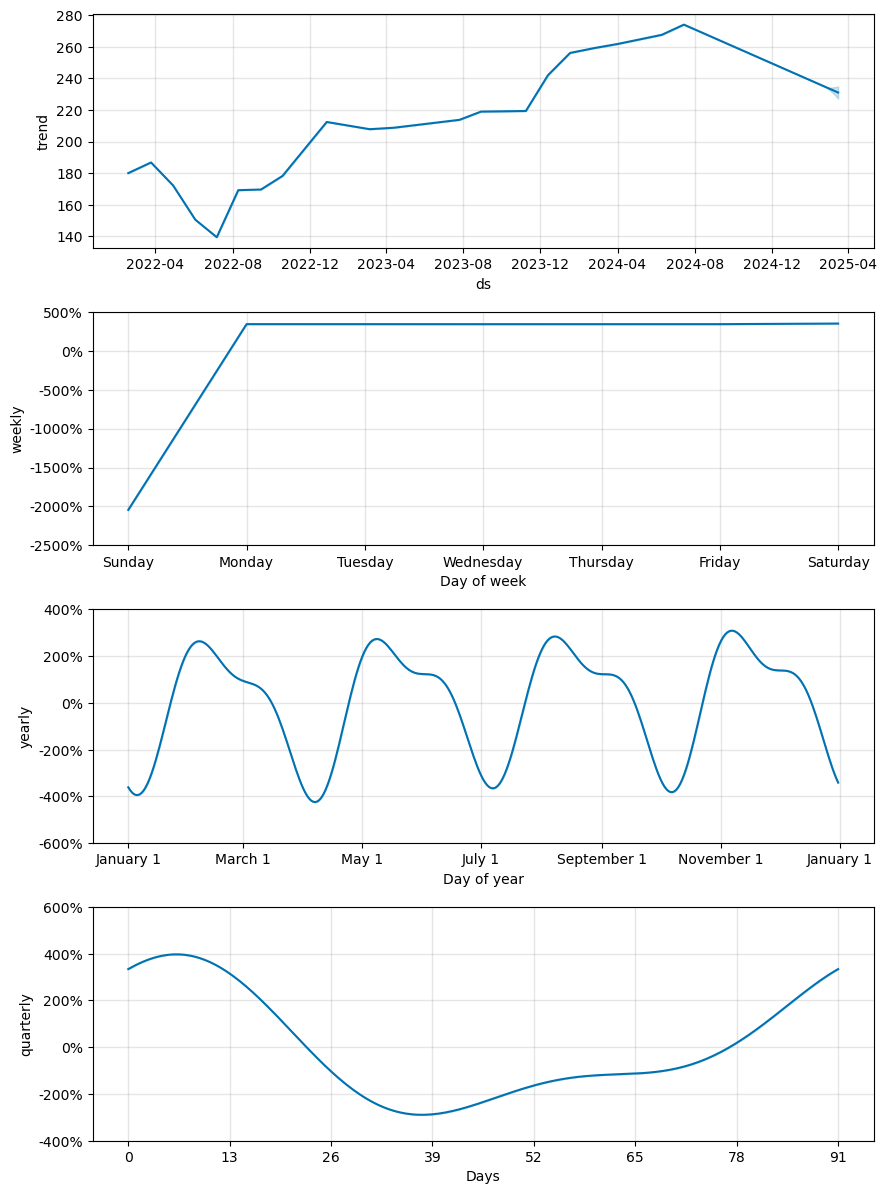

            ds         yhat   yhat_lower   yhat_upper
741 2025-02-15  1018.299138   990.103301  1048.288805
742 2025-02-16 -4621.266817 -4650.605425 -4591.490775
743 2025-02-17  1000.753091   974.071817  1029.024749
744 2025-02-18   999.627229   971.916524  1027.276452
745 2025-02-19   997.285876   968.066074  1024.538151
746 2025-02-20   995.873746   966.663219  1024.794090
747 2025-02-21   994.199462   966.861334  1026.042203
748 2025-02-22  1009.272575   979.537595  1038.660443
749 2025-02-23 -4603.691108 -4634.312930 -4570.794220
750 2025-02-24   986.296389   959.092607  1015.133203
751 2025-02-25   982.692376   954.384301  1013.726995
752 2025-02-26   978.093780   948.487761  1011.001108
753 2025-02-27   974.660448   942.603460  1003.417714
754 2025-02-28   971.239476   939.162984  1000.436844
755 2025-03-01   984.789758   952.098696  1012.957386
756 2025-03-02 -4599.799638 -4639.627497 -4559.757534
757 2025-03-03   960.157285   928.019826   988.688566
758 2025-03-04   956.326908 

In [62]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# List of Bank Tickers for Your Data
bank_tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS']

# Loop through Each Bank Ticker and Fit a Model
for ticker in bank_tickers:
    # Prepare the Data for Prophet. Prophet expects a DataFrame with 'ds' (date) and 'y' (values)
    bank_data = data[ticker]  # Use the Corresponding Stock Data
    prophet_data = bank_data.reset_index()
    prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

    # Ensure the 'ds' Column is in DateTime Format and Remove any Timezone Information
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

    # Initialize the Prophet Model with Tuning Parameters
    model = Prophet(
        growth='linear',                 # Change to 'logistic' if You Expect Saturation
        changepoint_prior_scale=0.05,    # Adjust Flexibility for Changepoints
        seasonality_mode='multiplicative',  # 'additive' or 'multiplicative'
        yearly_seasonality=True,         # Auto-Detect Yearly Patterns or Specify Frequency
        weekly_seasonality=True          # Enable Weekly Patterns
    )

    # Add Additional Custom Seasonality (e.g., Quarterly Seasonality)
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

    # Fit the Model to Historical Data
    model.fit(prophet_data)

    # Create a DataFrame for Future Predictions (Next 30 Days)
    future = model.make_future_dataframe(periods=30)

    # Generate Forecast
    forecast = model.predict(future)

    # Plot the Forecast
    plt.figure(figsize=(10, 6))
    fig = model.plot(forecast)
    plt.title(f'Tuned Prophet 30-Day Forecast for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel(f'{ticker} Stock Price')
    plt.show()

    # Optional: Plot Forecast Components (Trend, Seasonality, etc.)
    fig2 = model.plot_components(forecast)
    plt.show()

    # Display the Forecasted Values for the Next 30 Days
    forecast_summary = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
    print(forecast_summary)